<a href="https://colab.research.google.com/github/noviaptr/Assignment_StartupCampus/blob/main/Data_Preprocessing_Prediction_to_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. Business Understanding**

##**Business Problem**

------
Industri kesehatan saat ini dihadapkan pada beberapa tantangan besar, salah satunya adalah meningkatkan infrastruktur kesehatan untuk mendiagnosa penyakit sejak dini dan memberikan perawatan yang tepat waktu. Hal ini penting untuk meningkatkan kualitas hidup pasien dan mengurangi angka kematian akibat penyakit.​

Salah satu masalah kesehatan yang sangat penting adalah penyakit jantung. Ikatan Dokter Indonesia (IDI) mengatakan, terdapat sekitar 17 juta kematian per tahun akibat Penyakit Kardiovaskular (CVD) dan merupakan 31 persen dari seluruh total kematian di dunia. Angka ini diprediksi akan terus meningkat hingga 23 juta kematian per tahun di 2030.Organisasi Kesehatan Dunia (WHO) juga mencatat bahwa Penyakit Kardiovaskular (CVD) adalah penyebab utama kematian di seluruh dunia,  merenggut sekitar 17.9 juta nyawa pada tahun 2019 , yang merupakan 32% dari total kematian global.​

Dalam menghadapi tantangan ini, sangat penting untuk mengidentifikasi faktor-faktor risiko yang berkontribusi secara signifikan terhadap  penyakit jantung.




**REFERENSI:**

https://fk.ui.ac.id/infosehat/penyakit-jantung-jadi-penyebab-utama-kematian-di-dunia-bagaimana-mencegahnya/​

https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

##**Goals**
------


 Mengetahui faktor-faktor berisiko yang dapat mempengaruhi penyakit jantung berdasarkan feature-feature yang terdapat di dalam data.







#**II. Data Understanding**
Setelah pemahaman bisnis kita sudah mendalam, langkah selanjutnya adalah memahami data-data yang tersedia. Dengan memahami data dengan baik, nantinya dapat merencanakan analisis yang tepat, menentukan pemrosesan data yang diperlukan, dan menghindari kesalahan interpretasi yang mungkin timbul.

### **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

# Library untuk membuat visualisasi data interaktif.
import altair as alt # https://altair-viz.github.io/user_guide/api.html

### **Membaca Dataset**

In [ ]:
heart_disease = pd.read_csv('/content/heart.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Melihat gambaran awal dari dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### **Memahami Dataset**

In [ ]:
# Menampilkan jumlah kolom dan baris
heart_disease.shape

(1025, 14)

In [ ]:
# Menampilkan kolom-kolom yang terdapat dalam dataset
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Dari 14 kolom di atas yang didukung pada [referensi lain](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) dapat kita ketahui penjelasan masing-masing field dan label adalah sebagai berikut:
1. **age**, umur dalam tahun
2. **sex**, jenis kelamin.
  * 0: female.
  * 1: male.
3. **cp**, jenis sakit dada.
  * 0: Typical angina
  * 1: Atypical angina
  * 2: Non-anginal pain
  * 3: Asymptomatic
4. **trestbps**, tekanan darah pasien pada saat istirahat, diukur dalam mmHg.
5. **chol**, kadar kolesterol dalam mg/dl.
6. **fbs**, kadar gula darah pasien saat puasa (belum makan), jika gula darah puasa > 120 mg/dl.
  * 0: tidak.
  * 1: ya.
7. **restecg**, hasil elektrokardiografi pasien saat istirahat.
  * 0: normal.
  * 1: memiliki kelainan gelombang ST-T (gelombang T inversi dan/atau elevasi atau depresi ST > 0,05 mV).
  * 2: mengindikasikan hipertrofi ventrikel kirI menurut kriteria Estes.
8. **thalach**, tekanan darah maksimal yang dapat dicapai atau detak jantung maksimum yang dicapai oleh pasien selama tes olahraga (diukur dalam bpm)
9. **exang**, latihan diinduksi angina (pasien mengalami angina (nyeri dada) yang dipicu oleh aktivitas olahraga)
  * 0: tidak.
  * 1: ya.
10. **oldpeak**, depresi ST yang dipicu oleh olahraga relatif terhadap istirahat.
11. **slope**, kemiringan segmen ST latihan puncak atau kemiringan segmen ST pada elektrokardiogram (EKG) selama latihan fisik.
  * 0: miring ke atas.
  * 1: datar.
  * 2: menurun.
12. **ca**, jumlah vessel utama (0-3) diwarnai oleh flourosopy.
13. **thal**, penyakit thalassemia.
  * 1: normal.
  * 2: fixed defect.
  * 3: reversable defect.
14. **target**, label pada data.
  * 0: tidak terdiagnosa penyakit jantung.
  * 1: terdiagnosa penyakit jantung.

In [ ]:
# Menampilkan informasi mengenai dataset
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Menampilkan statistik deskriptif dari datasets
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Dalam proses understanding data, beberapa informasi yang didapatkan dari dataset heart disease ini, yaitu
1. Dataset memiliki total 14 kolom, dengan 13 kolom sebagai fitur dan 1 kolom sebagai label. 1 kolom yang digunakan sebagai label data adalah **kolom target**. Sedangkan 13 kolom lainnya digunakan sebagai fitur-fitur yang nantinya dianalisis mana yang merupakan faktor berisiko penyakit jantung.
2. Memiliki selisih mean dan median yang tidak terlalu jauh berbeda pada masing-masing fitur.

#**III. Data Prepocessing**

### **Data Wrangling**

#### **a. Konsistensi Format Data**

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Penjelasan:**

Dataset yang digunakan berasal dari platform Kaggle dan terdiri dari satu file CSV. Oleh karena itu, tidak diperlukan konsistensi lebih lanjut terkait format dataset. Selain itu, tipe data pada variabel-variabel telah disesuaikan dan tidak memerlukan penyesuaian tambahan karena sudah dalam format yang tepat. Pada proses gathering data yang dilakukan oleh pembuat dataset ini sebelumnya telah melakukan encoding, yaitu mengubah data kategorikal menjadi representasi numerik. Hal ini umum dilakukan agar model atau algoritma machine learning dapat memahami dan memproses data kategorikal, mengingat kebanyakan model hanya menerima input dalam bentuk numerik. Oleh karena itu, jika dilihat pada dataset terdapat beberapa variabel  yang bertipe data kategorikal, namun pada gambar disamping dapat dilihat semua variabel dataset bertipe numerik, yang artinya semuanya telah diubah menjadi tipe data numerik melalui proses encoding. Sehingga dalam konteks ini, tidak diperlukan lagi konsistensi format data karena sudah sesuai dengan kebutuhan yang ada.​

#### **b. Handling Missing Values**

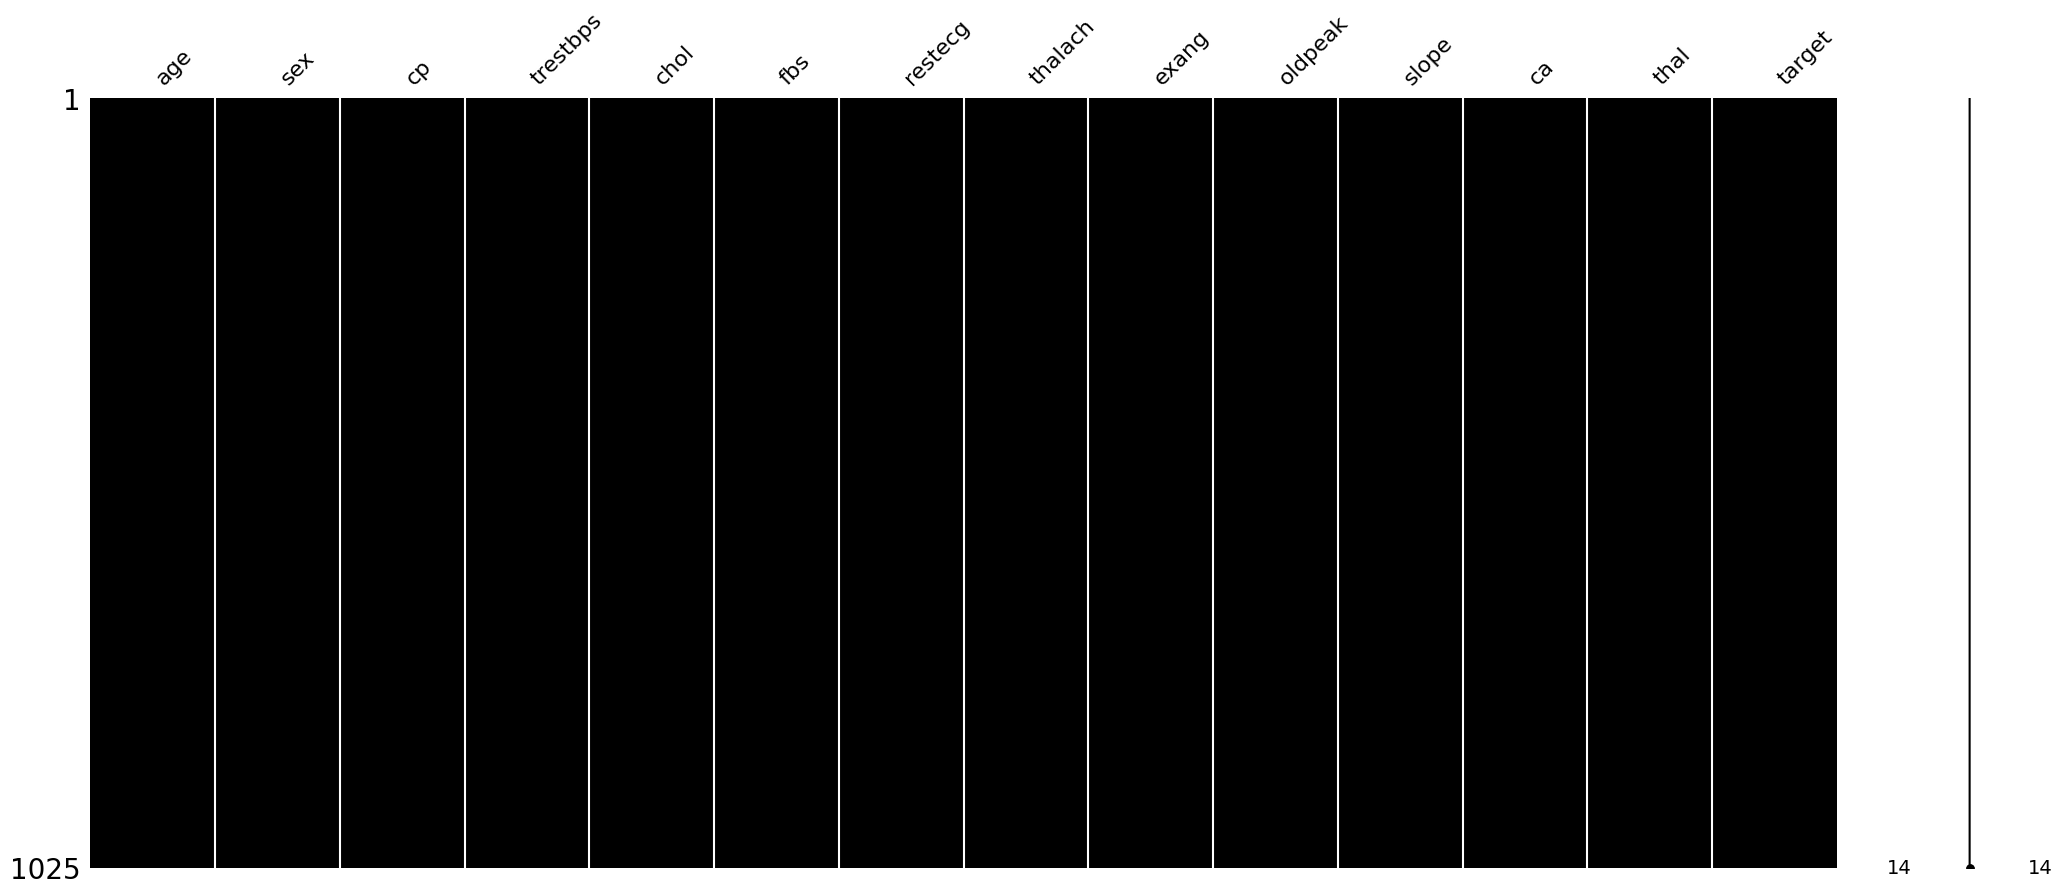

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Handling Missing Values
msno.matrix(heart_disease, color=(0,0,0))
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
# Pengecekan missing value juga bisa dilakukan dengan:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berdasarkan output diatas, dapat dilihat dataset heart disease tidak memiliki missing values. Namun, coba kita cek apakah terdapat anomaly data

In [ ]:
# Pengecekan value unik dari dataset
heart_disease.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Berdasarkan output diatas, terdapat anomaly data, yaitu pada kolom ca dan thal. Jika dilihat informasi setiap kolom pada bagian data understanding:
 - feature 'ca' memiliki 4 values yaitu 0-3, namun jika dilihat output dari value unik terlihat bahwa feature 'ca' memiliki 5 values, yaitu 0-4. Sehingga, label 4 ini akan dianggap sebagai missing values.
 - feature thal pada informasi memiliki 3 values yaitu 1-3, namun jika dilihat dari value unik kolom thal memiliki 4 values, yaitu 0-3, sehingga label 0 ini akan dianggap sebagai missing values

In [ ]:
# Menghitung jumlah masing-masing value dalam kolom 'ca'
heart_disease['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

**Penjelasan:**

Terdapat 18 baris data yang memiliki value 4. 18 baris data ini nantinya akan dianggap sebagai missing values

In [ ]:
# Menampilkan dataframe dengan kondisi kolom ca = 4 untuk melihat setiap baris datanya
heart_disease[heart_disease['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
# Mengganti kolom 'ca' yang bernilai '4' menjadi NaN
heart_disease.loc[heart_disease['ca']==4, 'ca'] = np.NaN

In [ ]:
# Mengecek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
heart_disease['ca'].value_counts()

0.0    578
1.0    226
2.0    134
3.0     69
Name: ca, dtype: int64

**Penjelasan:**

Dapat dilihat pada hasil output diatas, baris yang memiliki value 4 pada kolom `ca` telah berhasil dihilangkan.


In [ ]:
# Melakukan pengecekan pada dataframe apakah masih terdapat kolom ca yang bernilai 4
heart_disease[heart_disease['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# Menghitung jumlah masing-masing nilai dalam kolom 'thal'
heart_disease['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

**Penjelasan:**

Terdapat 7 baris data yang memiliki value 0. 7 baris data ini nantinya akan dianggap sebagai missing values

In [ ]:
# Menampilkan dataframe dengan kondisi kolom thal = 0 untuk melihat setiap baris datanya
heart_disease[heart_disease['thal']== 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [ ]:
# Mengganti kolom 'thal' yang bernilai '0' menjadi NaN
heart_disease.loc[heart_disease['thal']==0, 'thal'] = np.NaN

In [ ]:
# Mengecek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
heart_disease['thal'].value_counts()

2.0    544
3.0    410
1.0     64
Name: thal, dtype: int64

**Penjelasan:**

Dapat dilihat pada hasil output diatas, baris yang memiliki value 0 pada kolom `thal `telah berhasil dihilangkan.


In [ ]:
# Melakukan pengecekan pada dataframe apakah masih terdapat kolom thal yang bernilai 0
heart_disease[heart_disease['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


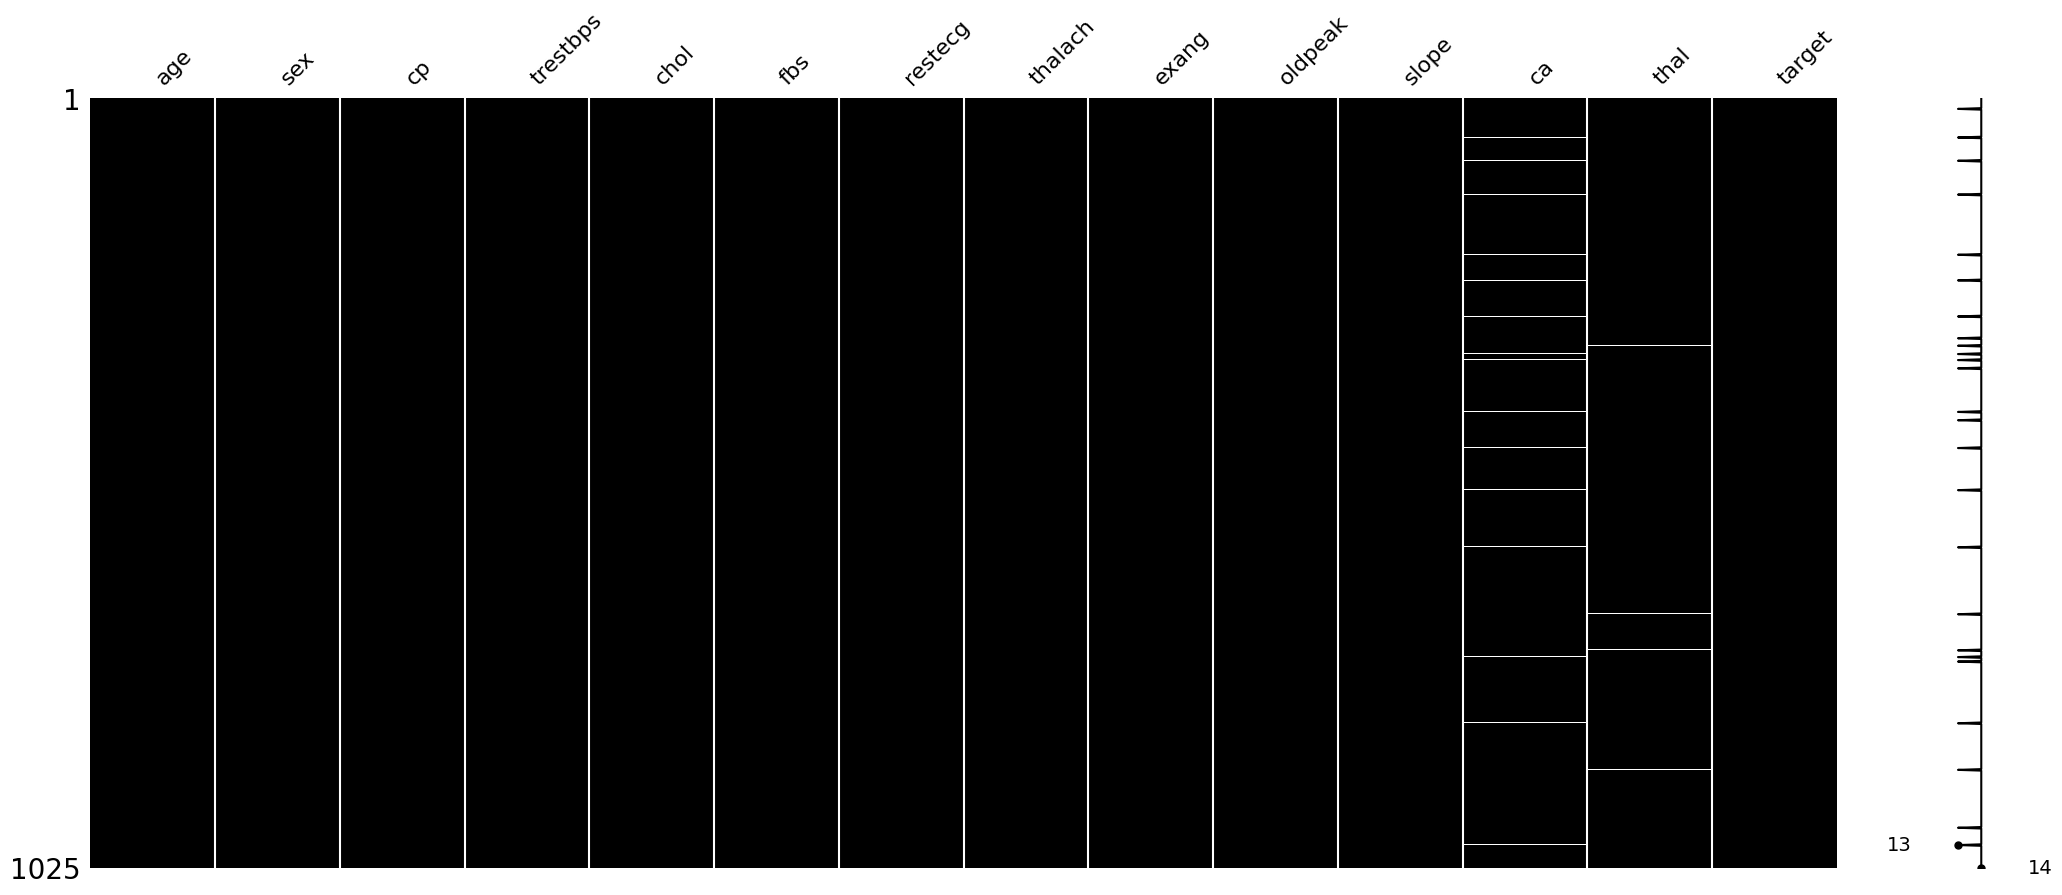

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Melakukan pengecekan kembali data-data yang missing value
msno.matrix(heart_disease, color=(0,0,0))
plt.figure(figsize=(10,6))
plt.show()

**Penjelasan :**

Dikarenakan sebelumnya terdapat beberapa baris data yang anomaly dihilangkan, pastinya pada kolom tersebut terdapat beberapa missing value, sehingga perlu dibersihkan

In [ ]:
heart_disease.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

Penjelasan :

Tedapat missing values pada kolom ca sebanyak 18 baris data dan pada kolom thal sebanyak 7 baris data, sehingga perlu dihandling.

In [ ]:
# Replace missing values kolom ca dan thal dengan modus karena merupakan data kategorikal
modus_ca = heart_disease['ca'].mode()[0]
heart_disease['ca'] = heart_disease['ca'].fillna(modus_ca)

modus_thal = heart_disease['thal'].mode()[0]
heart_disease['thal'] = heart_disease['thal'].fillna(modus_thal)

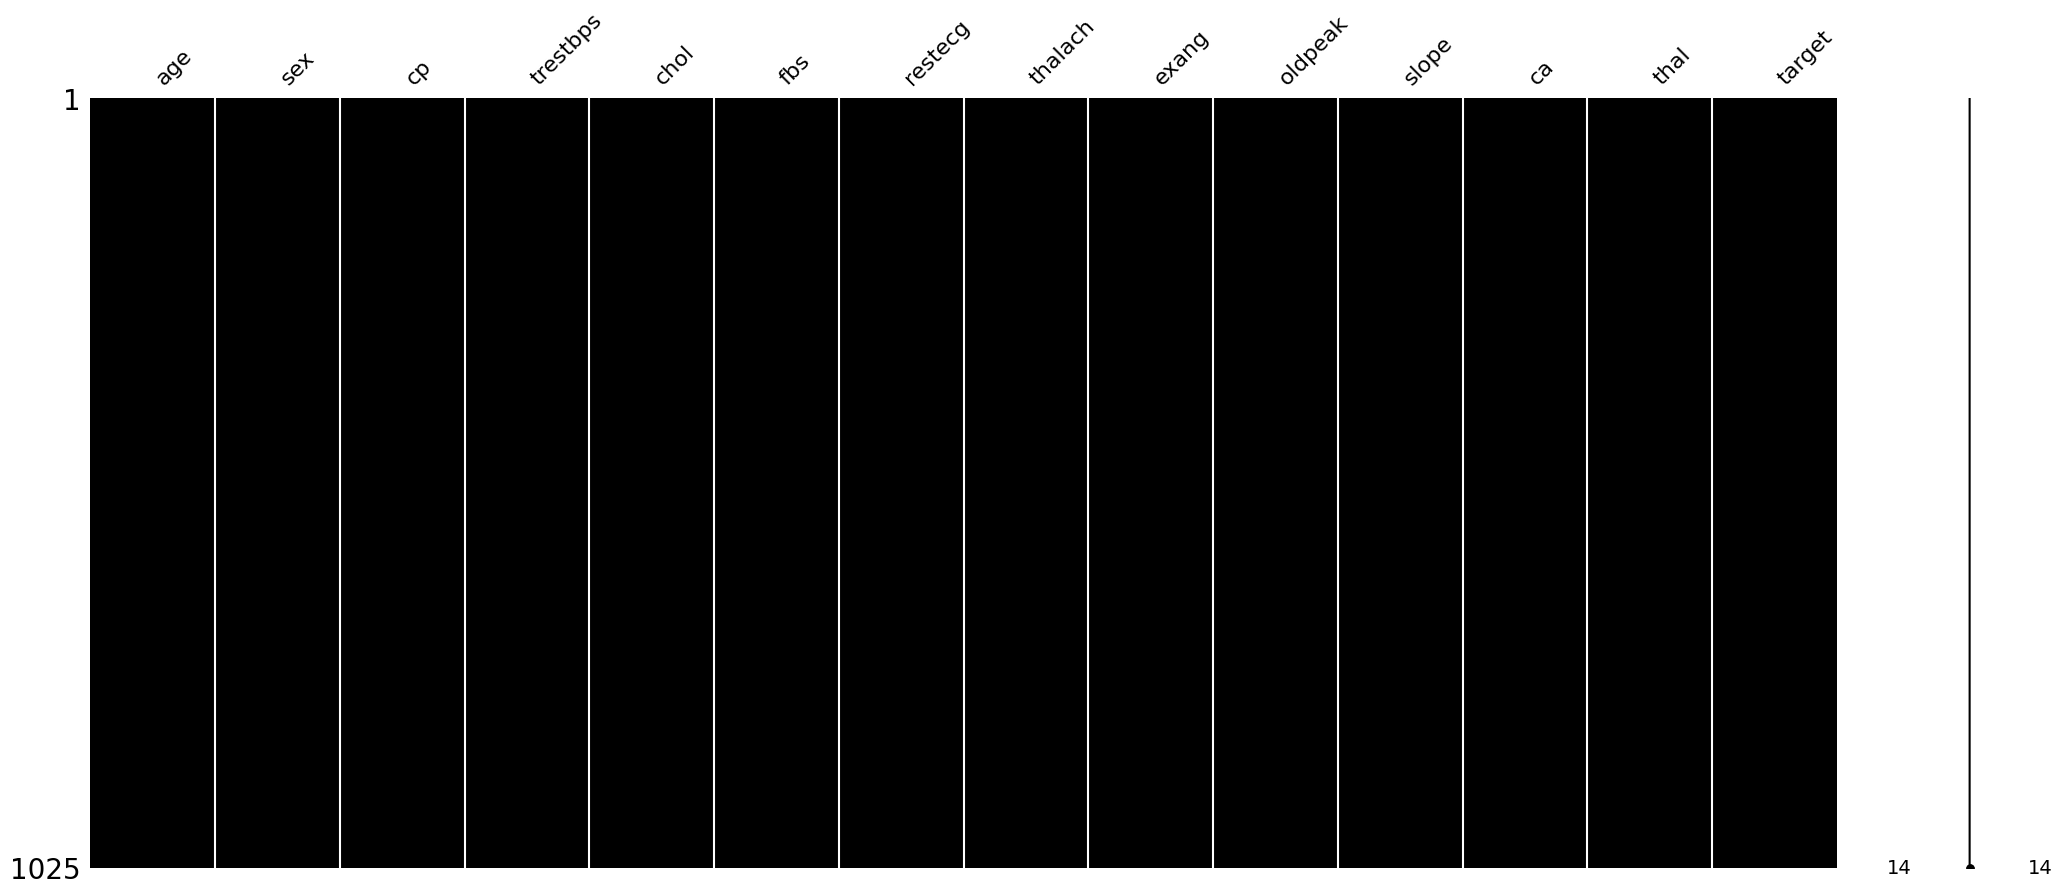

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Handling Missing Values
msno.matrix(heart_disease, color=(0,0,0))
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Penjelasan :**

Dapat dilihat pada output diatas bahwa dataset sudah tidak ada lagi missing values, sehingga dapat lanjut ke tahap berikutnya

In [ ]:
heart_disease['ca'] = heart_disease['ca'].astype(int)
heart_disease['thal'] = heart_disease['thal'].astype(int)

#### **c. Handling Duplicates Values**

In [ ]:
# Check Duplicate
heart_disease.duplicated().sum()

723

**Penjelasan :**

Terdapat 723 baris data yang duplikat sehingga harus dihapus

In [ ]:
# Handling Duplikat Data
heart_disease = heart_disease.drop_duplicates()

In [ ]:
# Mengecek kembali apakah masih terdapat duplikat data atau tidak
heart_disease.duplicated().sum()

0

**Penjelasan :**

Duplikat data berhasil dibersihkan

#### **d. Checking Outliers**

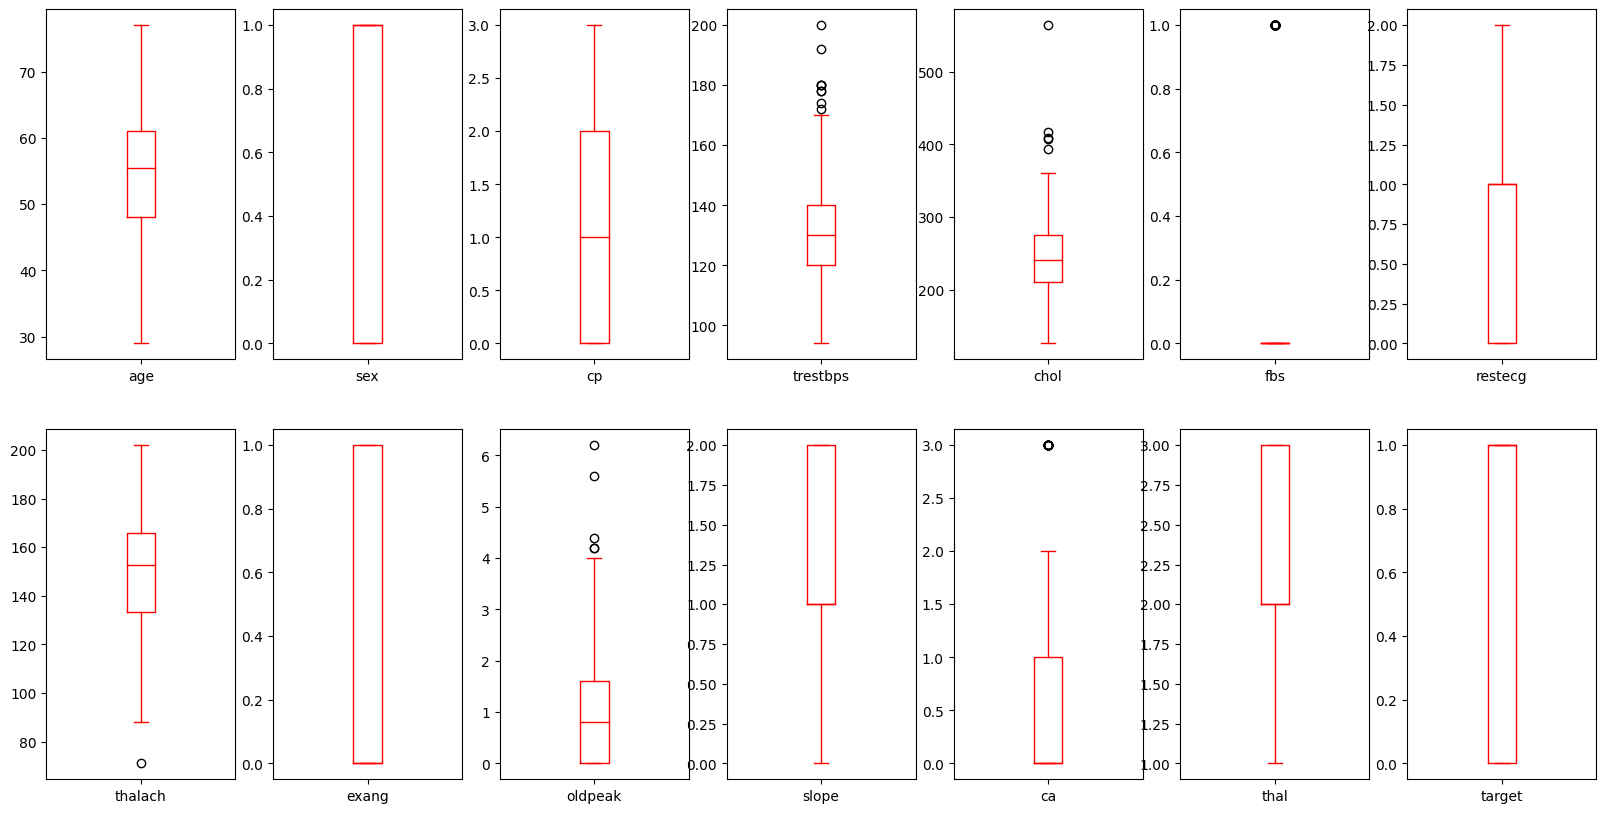

In [ ]:
# Handling Outliers dengan IQR
# Menampilkan boxplot untuk melihat outliers data numerik
heart_disease.plot(kind = 'box',subplots = True,layout = (2,7),sharex = False,sharey = False,figsize = (20, 10),color = 'r')
plt.show()

**Penjelasan:**

Dari visualisasi boxplot diatas, dapat dilihat bahwa beberapa variabel numerik memiliki outliers, yaitu trestbps, chol, thalach, oldpeak, dan ca

In [ ]:
# Function untuk mendeteksi outliers
def check_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Data numerik yang ingin diperiksa
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Menghitung jumlah outliers untuk setiap fitur numerik
outliers1 = check_outliers(heart_disease[num])

# Membuat DataFrame dari hasil perhitungan
outliers_df = pd.DataFrame({'Feature': outliers1.index, 'Number of Outliers': outliers1.values})

# Menampilkan DataFrame
outliers_df


,Feature,Number of Outliers
0,age,0
1,trestbps,9
2,chol,5
3,thalach,1
4,oldpeak,5
5,ca,20


In [ ]:
# Function untuk mendeteksi outliers extrem
def check_extreme_ouliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Data numerik yang ingin diperiksa
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Menghitung jumlah outliers untuk setiap fitur numerik
outliers2 = check_extreme_ouliers(heart_disease[num])

# Membuat DataFrame dari hasil perhitungan
outliers_df2 = pd.DataFrame({'Feature': outliers2.index, 'Number of Outliers': outliers2.values})

# Menampilkan DataFrame
outliers_df2


,Feature,Number of Outliers
0,age,0
1,trestbps,0
2,chol,1
3,thalach,0
4,oldpeak,0
5,ca,0


**Penjelasan:**


Dkutip dari [Formula Outliers](https://www.cuemath.com/outlier-formula/) & [Formula Outliers Extreme](https://condor.depaul.edu/sjost/lsp121/documents/boxplots.htm), kemudian diterapkan atau diimplementasikan formulanya pada dataset ini untuk pengecekan outliers.
Berdasarkan output diatas, informasi yang didapatkan sebagai berikut:
1. Outliers
  * Pada variabel age tidak terdapat data outlier
  * Pada variabel trestbps terdapat 9 outlier
  * Pada variabel chol terdapat 5 outlier
  * Pada variabel thalach terdapat 1 outlier
  * Pada variabel oldpeak terdapat 5 outlier
  * Pada variabel ca terdapat 20 outlier
2. Extreme Outliers
  * Terdapat satu ekstrem outliers pada variabel chol

Namun, outlier ini tidak dihilangkan dan tetap akan digunakan untuk proses selanjutnya.

#### **Checking imbalance data**

In [ ]:
# Pengecekan Imbalance Data
heart_disease['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

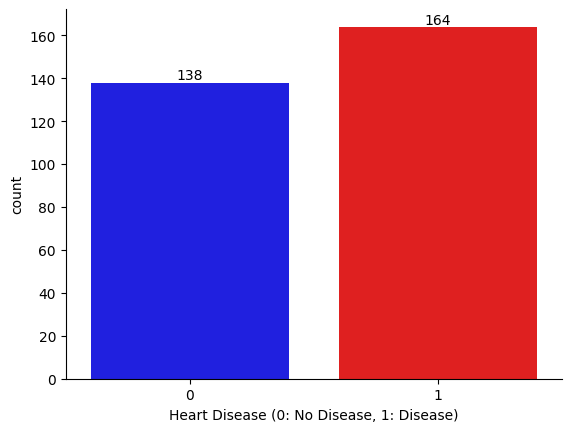

In [ ]:
# Membuat plot countplot
custom_palette = {0: "blue", 1: "red"}
ax = sns.countplot(data=heart_disease, x="target", palette=custom_palette)
# Menambahkan label pada bar
for label in ax.containers:
    ax.bar_label(label)
# Mengganti label x
plt.xlabel("Heart Disease (0: No Disease, 1: Disease)")
sns.despine()

# Menampilkan plot
plt.show()

**Penjelasan :**

Dapat dilihat pada output diatas data cukup seimbang (balanced), karena tidak terdapat perbedaan yang signifikan dimana pasien yang terdiagnosa disease adalah sebanyak 164 atau 54.3% dan pasien yang terdiagnosa no disease adalah sebanyak 138 atau 45,7% dengan selisih perbedaan diantara keduanya adalah sekitar 8,6%. Namun, tidak ada ukuran baku dalam mengukur imbalance data. Bergantung pada data dan case study yang ingin diselesaikan. Jika model machine learning yang nantinya dibuat tidak dapat memprediksi target minoritas dengan baik, maka  perlu dilakukan handling imbalance data.

### **Exploratory Data Analysis (EDA)**

#### **Elaborate features and its statistical data type (nominal, ordinal, numerical)**


In [ ]:
# Menampilkan informasi dataset
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


**Tipe Data Nominal**

Tipe data nominal merupakan tipe data yang digunakan untuk mengkategorikan atau mengelompokkan item/ objek tanpa adanya urutan tertentu.Data nominal tidak meiliki urutan atau hieararki atau tingkatan.  Ini berarti bahwa data nominal hanya memberikan informasi tentang apakah dua objek sama atau berbeda dalam hal kategori atau kelompok tertentu.
Dalam dataset heart disease ini, kolom-kolom atau variabel yang termasuk data nominal adalah:
  1. sex : Variabel ini memiliki dua kategori, yaitu "female" (perempuan) dengan nilai 0 dan "male" (laki-laki) dengan nilai 1. Ini adalah tipe data nominal karena jenis kelamin adalah kategori diskrit yang tidak memiliki urutan alami. Tidak ada urutan yang berarti antara perempuan dan laki-laki, keduanya hanya merepresentasikan kategori berbeda.
  2. fbs :  Variabel ini memiliki dua kategori, yaitu "tidak" (nilai 0) dan "ya" (nilai 1). Ini juga tipe data nominal karena hanya menggambarkan apakah kadar gula darah saat puasa melebihi ambang tertentu atau tidak. Tidak ada urutan yang berarti antara "tidak" dan "ya", hanya dua kategori yang berbeda.
  3. exang : Variabel ini juga memiliki dua kategori, yaitu "tidak" (nilai 0) dan "ya" (nilai 1). Seperti sebelumnya, ini adalah tipe data nominal karena hanya menggambarkan apakah angina (nyeri dada) dipicu oleh aktivitas fisik atau tidak. Tidak ada urutan yang bermakna antara kategori ini.
  4. target : Variabel target ini memiliki dua kategori, yaitu "tidak terdiagnosa penyakit jantung" (nilai 0) dan "terdiagnosa penyakit jantung" (nilai 1). Ini adalah tipe data nominal karena hanya menggambarkan apakah pasien terdiagnosa penyakit jantung atau tidak. Tidak ada urutan atau tingkatan antara kategori ini, hanya dua kategori berbeda.
  5. cp : Variabel ini adalah tipe data nominal karena jenis sakit dada yang diwakili oleh setiap kategori tidak memiliki urutan yang menggambarkan tingkat keparahan atau hierarki yang konsisten. Label seperti "Typical Angina,Atypical Angina," dll., adalah deskripsi kualitatif yang menjelaskan dan mengkategorikan jenis nyeri dada berdasarkan perbedaan gejala-gejala yang dirasakan pasien atau faktor lainnya.
  6. restecg : Variabel 'restecg' bertipe data nominal. Alasan mengapa "restecg" termasuk fitur nominal adalah karena ketiga kategori tersebut hanya melabelkan kondisi kesehatan pasien tanpa adanya urutan atau tingkatan keparahan tertentu. Kelas 0, 1, dan 2 mewakili kondisi yang berbeda tanpa adanya hubungan urutan antara satu kondisi dengan yang lain dan tidak dapat dikatakan bahwa satu kondisi lebih berat atau lebih rendah daripada yang lain berdasarkan nilai feature ini.
  7. slope : Variabel slope merupakan Kemiringan segmen ST pada elektrokardiogram (EKG) selama aktivitas fisik maksimal . jenis data yang menggambarkan kategori atau kelompok yang tidak memiliki urutan atau tingkatannya. Dalam EKG, ketiga kategori ini adalah tipe-tipe bentuk kemiringan segmen ST yang berbeda selama aktivitas fisik pasien maksimal.

**Tipe Data Ordinal**

Tipe data ordinal adalah tipe data yang digunakan untuk mengkategorikan atau mengelopokkan objek/item berdasarkan urutan atau tingkatan tertentu. skala yang digunakan untuk mengurutkan suatu objek pengamatan dimana suatu titik pengamatan memiliki nilai yang lebih rendah atau tinggi dibanding nilai lainnya.
Meskipun urutan atau tingkatannya ada, jarak antara nilai tidak didefinisikan dan tidak selalu konsisten.
Dalam dataset heart disease ini, kolom-kolom atau variabel yang termasuk data ordinal adalah:
  
  1. thal

Masing-masing variabel diatas berisi data dengan tingkat keparahan kondisi kesehatan pasien, mulai dari kondisi kesehatan pasien yang normal hingga kondisi gejala sakit atau penyakit yang parah.

**Tipe Data Numerik**

Tipe data numerik merupakan data yang memiliki nilai yang dapat diukur secara kuantitatif. Data numerik dapat berupa bilangan bulat (integer) atau bilangan float(pecahan). Data numerik memiliki sifat yang memungkinkan dilakukannya operasi matematika seperti penjumlahan, pengurangan, perkalian, pembagian, serta perhitungan statistik seperti rata-rata, median, dan lainnya. Dalam dataset heart disease ini, kolom-kolom atau variabel yang termasuk data numerik adalah:
  1. age : Variabel ini mengukur usia pasien dalam tahun. Usia adalah bilangan bulat yang dapat diukur secara kuantitatif. Varibel ini dapat dilakukan operasi matematika seperti penjumlahan, pengurangan, dan perbandingan.
  2. trestbps : Variabel ini berisi data tentang tekanan darah pasien pada saat istirahat dan diukur dalam mmHg (milimeter raksa). Ini adalah bilangan bulat yang menggambarkan tekanan darah secara kuantitatif. Variabel ini juga dapat dilakukan operasi matematik seperti rasio, rata-rata, median, dan lainnya.
  3. chol : Variabel ini mengukur kadar kolesterol pasien dalam mg/dl (miligram per desiliter). Kadar kolesterol adalah bilangan bulat atau float yang menggambarkan jumlah kolesterol dalam darah secara kuantitatif. Variabel ini juga dapat dilakukan operasi matematik seperti rasio, rata-rata, median, dan lainnya.
  4. thalach : Variabel ini mengukur detak jantung maksimum yang dapat dicapai oleh pasien selama tes olahraga dan diukur dalam bpm (denyut per menit). Ini adalah bilangan bulat yang menggambarkan detak jantung secara kuantitatif.
  5. oldpeak : Variabel ini mengukur tingkat depresi relatif terhadap istirahat yang dipicu oleh olahraga. nilai data ini bersifat float yang menggambarkan perubahan dalam elektrokardiogram secara kuantitatif.
  6. ca : Variabel ini mengukur jumlah vessel utama yang diwarnai oleh flourosopy. Ini adalah bilangan bulat yang menggambarkan jumlah secara kuantitatif.


#### **Describe distribution**



Text(0.5, 1.0, 'target')

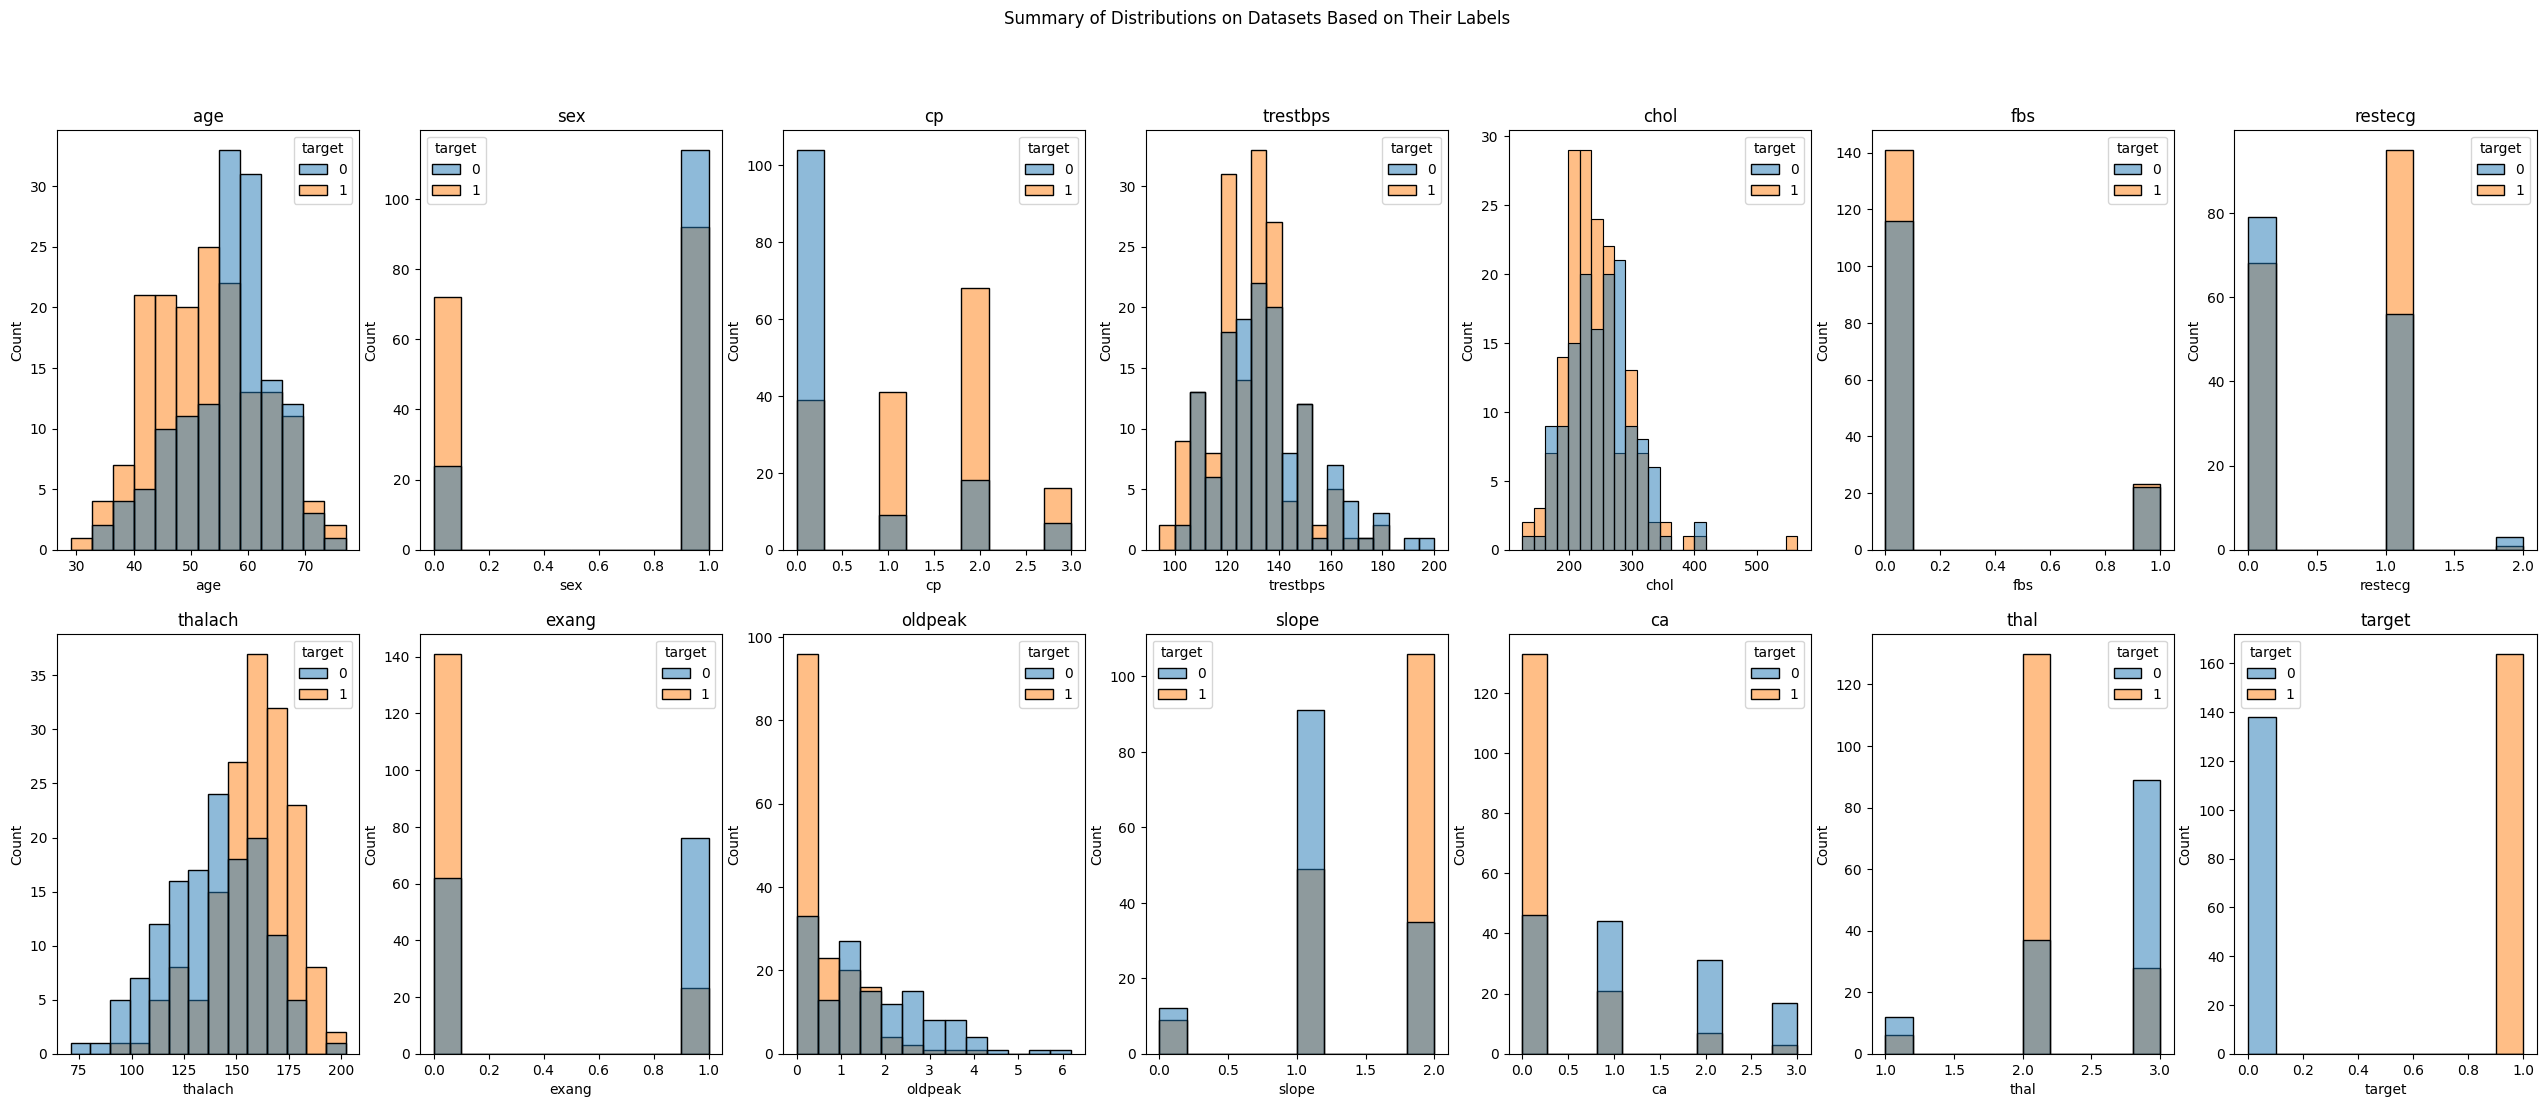

In [ ]:
fig, axs = plt.subplots(2, 7, figsize = (32,12))
fig.suptitle('Summary of Distributions on Datasets Based on Their Labels')

# visualisasi histogram untuk 'age'
sns.histplot(ax = axs[0,0], data =heart_disease, x = 'age', hue='target')
axs[0,0].set_title('age')

# visualisasi histogram untuk 'sex'
sns.histplot(ax = axs[0,1], data =heart_disease, x = 'sex', hue='target')
axs[0,1].set_title('sex')

# visualisasi histogram untuk 'cp'
sns.histplot(ax = axs[0,2], data =heart_disease, x = 'cp', hue='target')
axs[0,2].set_title('cp')

# visualisasi histogram untuk 'trestbps'
sns.histplot(ax = axs[0,3], data =heart_disease, x = 'trestbps', hue='target')
axs[0,3].set_title('trestbps')

# visualisasi histogram untuk 'chol'
sns.histplot(ax = axs[0,4], data =heart_disease, x = 'chol', hue='target')
axs[0,4].set_title('chol')

# visualisasi histogram untuk 'fbs'
sns.histplot(ax = axs[0,5], data =heart_disease, x = 'fbs', hue='target')
axs[0,5].set_title('fbs')

# visualisasi histogram untuk 'restecg'
sns.histplot(ax = axs[0,6], data =heart_disease, x = 'restecg', hue='target')
axs[0,6].set_title('restecg')

# visualisasi histogram untuk 'thalach'
sns.histplot(ax = axs[1,0], data =heart_disease, x = 'thalach', hue='target')
axs[1,0].set_title('thalach')

# visualisasi histogram untuk 'exang'
sns.histplot(ax = axs[1,1], data =heart_disease, x = 'exang', hue='target')
axs[1,1].set_title('exang')

# visualisasi histogram untuk 'oldpeak'
sns.histplot(ax = axs[1,2], data =heart_disease, x = 'oldpeak', hue='target')
axs[1,2].set_title('oldpeak')

# visualisasi histogram untuk 'slope'
sns.histplot(ax = axs[1,3], data =heart_disease, x = 'slope', hue='target')
axs[1,3].set_title('slope')

# visualisasi histogram untuk 'ca'
sns.histplot(ax = axs[1,4], data =heart_disease, x = 'ca', hue='target')
axs[1,4].set_title('ca')

# visualisasi histogram untuk 'thal'
sns.histplot(ax = axs[1,5], data =heart_disease, x = 'thal', hue='target')
axs[1,5].set_title('thal')

# visualisasi histogram untuk 'target'
sns.histplot(ax = axs[1,6], data =heart_disease, x = 'target', hue='target')
axs[1,6].set_title('target')

##### **1. age**



Text(0.5, 1.0, 'Distribution of Age')

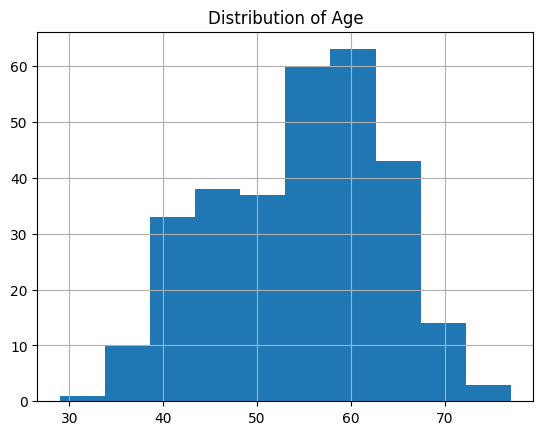

In [ ]:
heart_disease['age'].hist().plot(kind='bar')
plt.title('Distribution of Age')

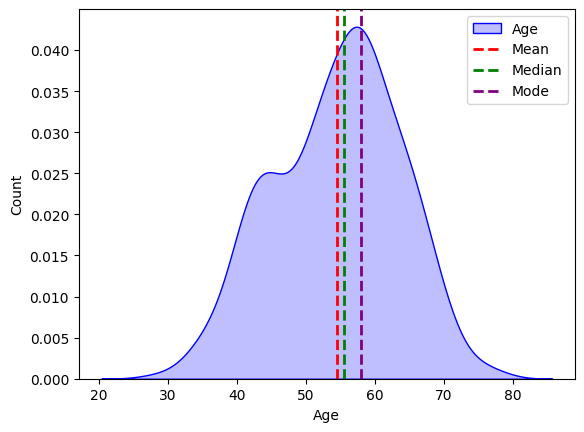

In [ ]:
sns.kdeplot(heart_disease['age'], fill=True, color='blue', label='Age')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_age = heart_disease['age'].mean()
median_age = heart_disease['age'].median()
mode_age = heart_disease['age'].mode()[0]
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_age, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Membuat label
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

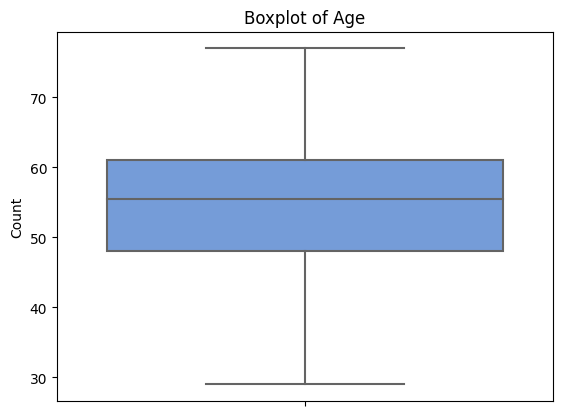

In [ ]:
sns.boxplot(y='age', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of Age')

# Menampilkan plot
plt.show()

In [ ]:
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['age'])
median = np.median(heart_disease['age'])
mode = stats.mode(heart_disease['age'])

# Membuat DataFrame
df = pd.DataFrame({
    'Statistik': ['Mean', 'Median', 'Modus'],
    'Hasil': [mean, median, mode]
})

df

,Statistik,Hasil
0,Mean,54.42053
1,Median,55.5
2,Modus,"(58, 19)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi di rentang usia 40 - 60 tahun.
2. Berdasarkan histogram `Distribution of Age`,, dapat dilihat rata-rata usia pasien(mean) mayoritas berada di rentang usia 50-60 tahun. Jika dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata usia 54.42 tahun, median nya 56 tahun, dan modus nya adalah 58 tahun (dalam hal ini pasien terbanyak berusia 58 tahun, yaitu berjumlah 19 orang). Hal ini menunjukkan usia pasien cenderung **berdistribusi mendekati normal**.
  * Distribusi normal, juga dikenal sebagai distribusi Gauss atau distribusi Gaussian, adalah salah satu jenis distribusi probabilitas yang paling umum digunakan dalam statistik. Mean, median, dan modus dalam distribusi normal memiliki nilai yang hampir sama dan terletak di tengah distribusi. Kurva distribusi normal memiliki bentuk lonceng, dengan sebagian besar data berpusat di sekitar nilai mean, dan semakin menjauh dari mean, frekuensi data semakin berkurang. Distribusi normal didefinisikan oleh dua parameter, yaitu mean (μ) dan deviasi standar (σ), yang mengukur posisi dan sebaran data.
  * Dalam case study ini, nilai mean, median, dan modus usia pasien berada pada nilai yang relatif mendekati satu sama lain, menunjukkan bahwa distribusi usia pasien cenderung simetris di sekitar nilai tengah distribusi tersebut.
  * Dalam hal penanganan missing values, jika data cenderung berdistribusi normal, pendekatan yang tepat adalah menggantikan missing values dengan nilai mean, karena memungkinkan untuk mempertahankan seluruh data yang ada tanpa menghilangkan observasi tersebut. Pendekatan ini membantu menjaga stabilitas statistik seperti mean, karena nilai mean tetap mendekati nilai sebenarnya dari populasi jika penggantian tersebut dilakukan dengan benar.

##### **2. sex**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('sex:N', title='Sex (0:Female, 1:Male)'),
    y=alt.Y('count(sex):Q', title='Count of Sex'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(sex):Q').properties(height=300, width=400, title='Barplot of Sex')

chart

alt.Chart(...)

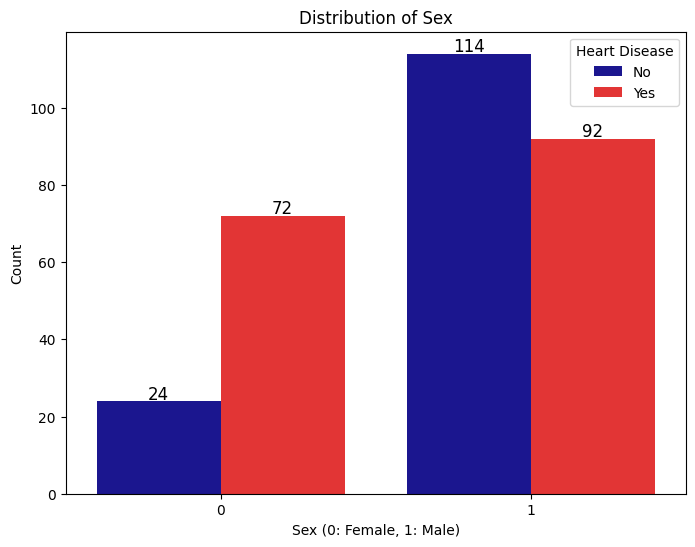

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='sex', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Penderita penyakit jantung banyak diderita oleh laki-laki
2. Distribusi pasien dalam dataset ini lebih banyak berjeniskelamin laki-laki dibandingkan perempuan, dengan rasio 2 : 1
3.  Jumlah pasien yang terdata adalah 302, dengan 206 pasien laki-laki dan  96 pasien perempuan
  * Dari 206 pasien berjenis kelamin laki-laki, terdapat 92 yang terdiagnosa penyakit jantung dan 114 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien berjenis kelamin laki-laki dengan status disease dan non disease sekitar 1:2
  * Dari 96 pasien berjenis kelamin perempuan, terdapat 72 yang terdiagnosa penyakit jantung dan 24 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien berjenis kelamin perempuan dengan status disease dan non disease sekitar 3:1






##### **3. cp (Chest Pain Type)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('cp:N', title='Chest Pain Type'),
    y=alt.Y('count(cp):Q', title ='Count'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(cp):Q').properties(height=300, width=400, title = 'Barplot of Chest-pain type')

chart

alt.Chart(...)

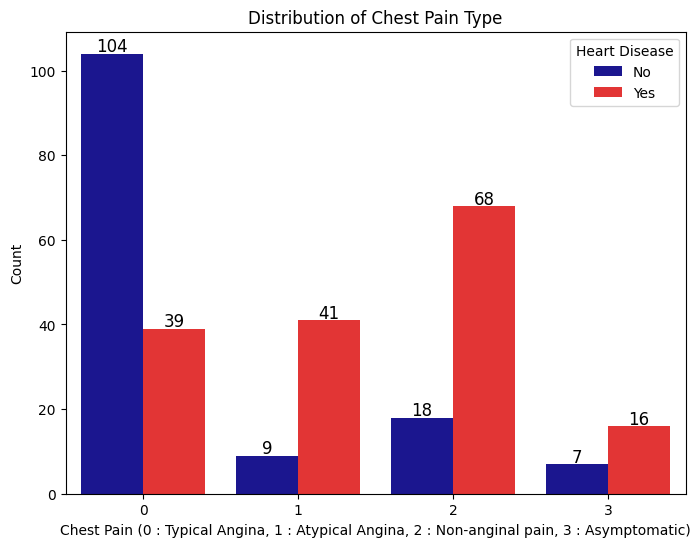

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='cp', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Chest Pain (0 : Typical Angina, 1 : Atypical Angina, 2 : Non-anginal pain, 3 : Asymptomatic)')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan:**


Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Penderita penyakit jantung mayoritas memiliki jenis chest pain non-anginal pain
2. Distribusi pasien dalam dataset ini mayoritas memiliki jenis chest pain Typical Angina dan minim pasien yang memiliki jenis chest pain Asymptomatic
3. Jumlah pasien yang terdata adalah 302, dengan 143 pasien memiliki jenis chest pain typical angina, 86 pasien dengan jenis chest pain non-anginal pain, 50 pasien dengan jenis chest pain atypical angina, dan 23 pasien dengan jenis chest pain atypical angina
  * Dari 143 pasien yang memiliki jenis chest pain typical angina, terdapat 39 yang terdiagnosa penyakit jantung dan 104 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease sekitar 1:3
  * Dari 50 pasien yang memiliki jenis chest pain atypical angina, terdapat 41 yang terdiagnosa penyakit jantung dan 9 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease sekitar 5:1
  * Dari 86 pasien yang memiliki jenis chest pain non_anginal pain, terdapat 68 yang terdiagnosa penyakit jantung dan 18 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease sekitar 4:1
  * Dari 23 pasien yang memiliki jenis chest pain asymptotic, terdapat 16 yang terdiagnosa penyakit jantung dan 7 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease sekitar 2:1





##### **4. trestbps (Resting Blood Pressure)**

Text(0.5, 1.0, 'Distribution of Resting Blood Pressure')

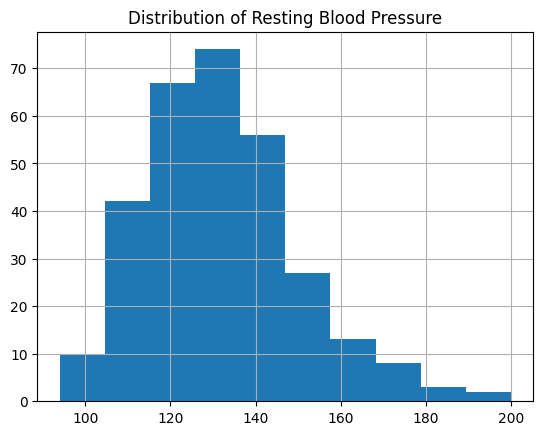

In [ ]:
heart_disease['trestbps'].hist().plot(kind='bar')
plt.title('Distribution of Resting Blood Pressure')

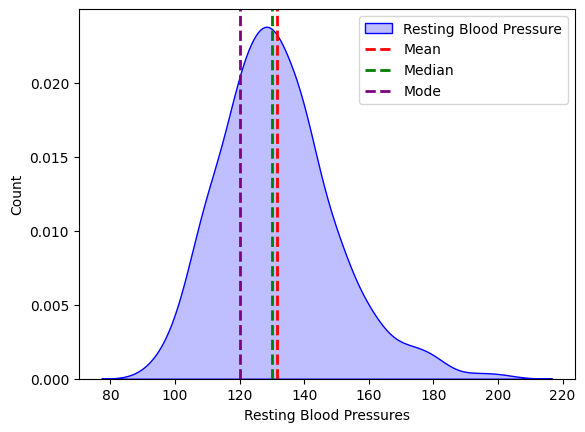

In [ ]:
sns.kdeplot(heart_disease['trestbps'], fill=True, color='blue', label='Resting Blood Pressure')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_trestbps = heart_disease['trestbps'].mean()
median_trestbps = heart_disease['trestbps'].median()
mode_trestbps = heart_disease['trestbps'].mode()[0]
plt.axvline(mean_trestbps, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_trestbps, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_trestbps, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Menandai label
plt.xlabel('Resting Blood Pressures')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

# Mengambil data kolom 'trestbps' dari DataFrame heart_disease
trestbps_data = heart_disease['trestbps']

# Menghitung skewness dari kolom 'trestbps'
trestbps_skew = skew(trestbps_data)

# Menampilkan nilai skewness
print("Skewness dari kolom 'trestbps' adalah:", trestbps_skew)

Skewness dari kolom 'trestbps' adalah: 0.7129775303337106


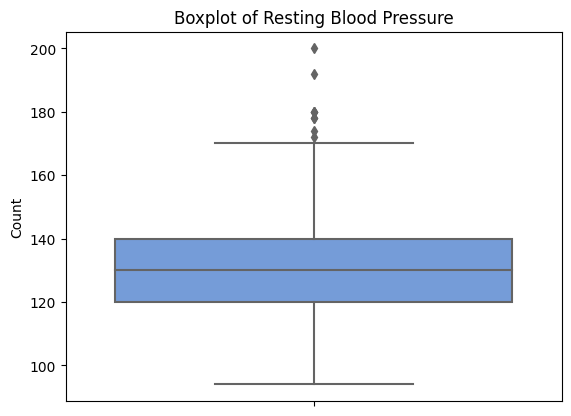

In [ ]:
sns.boxplot(y='trestbps', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of Resting Blood Pressure')

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['trestbps'])
median = np.median(heart_disease['trestbps'])
mode = stats.mode(heart_disease['trestbps'])

# Membuat data frame
result_heart_disease = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Modus'],
    'Result': [mean, median, mode]
})

# Menampilkan data frame
result_heart_disease

,Statistics,Result
0,Mean,131.602649
1,Median,130.0
2,Modus,"(120, 37)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi pada rentang tingkat kolesterol 200 - 300 mg/dl.​

2. Berdasarkan histogram Distribution of Serum Cholestrol, dapat dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata serum cholestrol sebesar 246.5 mg/dl, mediannya 241 mg/dl, dan modusnya adalah 197 mg/dl (dalam hal ini pasien terbanyak memiliki serum cholestrol 197mg/dl, yaitu berjumlah 6 dari total pasien)​

3. Dalam case study ini, mean serum cholestrol (131.6 mg/dl) lebih besar dari median (130 mg/dl) dan modus (120 mg/dl) atau secara singkatnya nilai mean > median > modus. Selain itu, ditandai dengan banyaknya outliers. Aadanya outliers pada data serum cholestrol dapat memanjangkan ekor distribusi di sisi kanan, yang merupakan salah satu karakteristik distribusi skew positif. Outliers adalah nilai-nilai yang jauh lebih besar dari sebagian besar data, dan memiliki pengaruh signifikan terhadap mean. Outliers dengan nilai yang tinggi akan "menarik" mean ke arah yang lebih tinggi, menyebabkan distribusi miring ke kanan. Sehingga, disimpulkan serum cholestrol ini cenderung berdistribusi skew positif

4. Dalam hal penanganan missing values, jika data nya cenderung berdistribusi skew, penanganan yang tepat adalah menggantikan missing values dengan nilai median. Hal ini dikarenakan mean akan lebih terpengaruh oleh nilai outlier, sedangkan median tidak terpengaruh oleh nilai outlier. Pada variabel dengan distribusi yang skew, nilai outlier akan cenderung berada di salah satu sisi distribusi. Nilai outlier ini dapat menyebabkan mean menjadi lebih tinggi atau lebih rendah dari nilai median. Jika nilai missing diisi dengan nilai mean, maka nilai rata-rata data dapat menjadi lebih tinggi atau lebih rendah dari nilai sebenarnya. Hal ini dapat menyebabkan hasil analisis data menjadi bias. Sedangkan jika nilai missing diisi dengan nilai median, maka nilai rata-rata data akan cenderung tetap sama dengan nilai sebenarnya. Hal ini dikarenakan median tidak terpengaruh oleh nilai outlier.

##### **5. chol (Serum Cholesterol)**

Text(0.5, 1.0, 'Distribution of Serum Cholestrol')

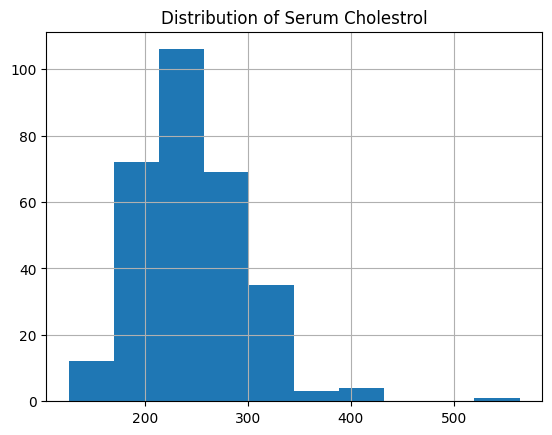

In [ ]:
heart_disease['chol'].hist().plot(kind='bar')
plt.title('Distribution of Serum Cholestrol')

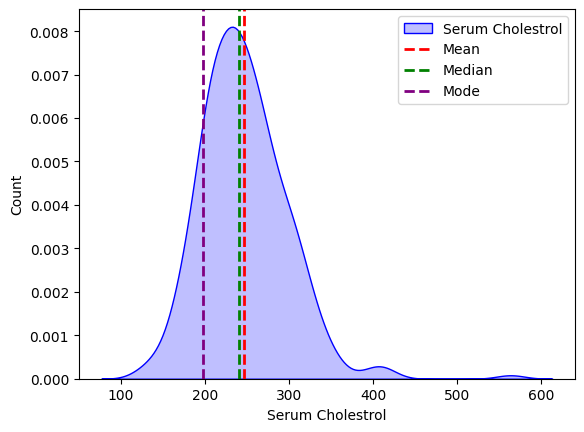

In [ ]:
sns.kdeplot(heart_disease['chol'], fill=True, color='blue', label='Serum Cholestrol')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_chol = heart_disease['chol'].mean()
median_chol = heart_disease['chol'].median()
mode_chol = heart_disease['chol'].mode()[0]
plt.axvline(mean_chol, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_chol, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_chol, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Menandai label
plt.xlabel('Serum Cholestrol')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

# Mengambil data kolom 'chol' dari DataFrame heart_disease
chol_data = heart_disease['chol']

# Menghitung skewness dari kolom 'chol'
chol_skew = skew(chol_data)

# Menampilkan nilai skewness
print("Skewness dari kolom 'chol' adalah:", chol_skew)

Skewness dari kolom 'chol' adalah: 1.1416258623729787


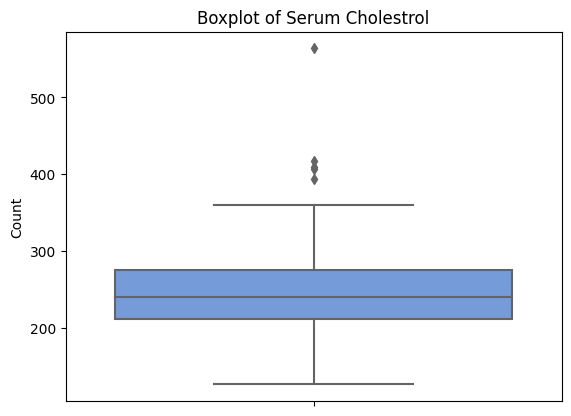

In [ ]:
sns.boxplot(y='chol', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of Serum Cholestrol')

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['chol'])
median = np.median(heart_disease['chol'])
mode = stats.mode(heart_disease['chol'])

# Membuat data frame
result_heart_disease = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Modus'],
    'Result': [mean, median, mode]
})

# Menampilkan data frame
result_heart_disease

,Statistics,Result
0,Mean,246.5
1,Median,240.5
2,Modus,"(197, 6)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi pada rentang tingkat kolesterol 200 - 300 mg/dl.
2. Berdasarkan histogram Distribution of Serum Cholestrol, dapat dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata serum cholestrol sebesar 246.5 mg/dl, mediannya 241 mg/dl, dan modusnya adalah 197 mg/dl (dalam hal ini pasien terbanyak memiliki serum cholestrol 197mg/dl, yaitu berjumlah 6 dari total pasien).
3. Dalam case study ini, mean serum cholestrol (131.6 mg/dl) lebih besar dari median (130 mg/dl) dan modus (120 mg/dl) atau secara singkatnya nilai mean > median > modus. Selain itu, adanya nilai  outliers yang besar pada variabel serum cholestrol dapat memanjangkan ekor distribusi di sisi kanan, yang merupakan salah satu karakteristik distribusi skew positif. Outliers dengan nilai yang tinggi akan "menarik" mean ke arah yang lebih tinggi, menyebabkan distribusi miring ke kanan. Sehingga, disimpulkan variabel serum cholestrol ini cenderung berdistribusi skew positif
4. Dalam hal penanganan missing values, jika data nya cenderung berdistribusi skew, penanganan yang tepat adalah menggantikan missing values dengan nilai median. Hal ini dikarenakan mean akan lebih terpengaruh oleh nilai outlier, sedangkan median tidak terpengaruh oleh nilai outlier. Pada variabel dengan distribusi yang skew, nilai outlier akan cenderung berada di salah satu sisi distribusi. Nilai outlier ini dapat menyebabkan mean menjadi lebih tinggi atau lebih rendah dari nilai median. Jika nilai missing diisi dengan nilai mean, maka nilai rata-rata data dapat menjadi lebih tinggi atau lebih rendah dari nilai sebenarnya. Hal ini dapat menyebabkan hasil analisis data menjadi bias. Sedangkan jika nilai missing diisi dengan nilai median, maka nilai rata-rata data akan cenderung tetap sama dengan nilai sebenarnya. Hal ini dikarenakan median tidak terpengaruh oleh nilai outlier.

##### **6. fbs (Fasting Blood Sugar)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('fbs:N', title='Fasting Blood Sugar (0:<=120 mg/dl, 1:>120 mg/dl) '),
    y=alt.Y('count(fbs):Q', title ='Count of fbs'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(fbs):Q').properties(height=300, width=400, title = 'Barplot of Fasting Blood Sugar')

chart

alt.Chart(...)

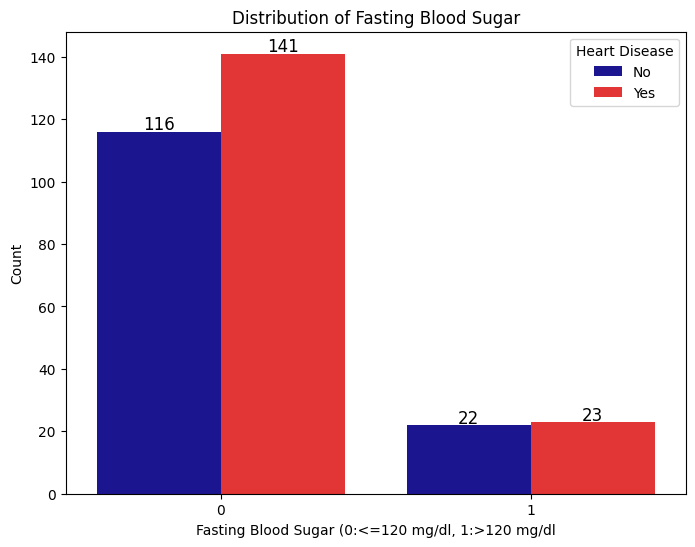

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='fbs', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Fasting Blood Sugar (0:<=120 mg/dl, 1:>120 mg/dl')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Penderita penyakit jantung mayoritas memiliki fasting blood sugar <= 120 mg/dl
2. Distribusi pasien dalam dataset ini lebih banyak memiliki fasting blood sugar <= 120 mg/dl  dibandingkan pasien yang memiliki fasting blood sugar > 120 mg/dl dengan rasio 6 : 1
3. Jumlah pasien yang terdata adalah 302, dengan 257 pasien yang memiliki fasting blood sugar <= 120 mg/dl dan  45 pasien yang memiliki fasting blood sugar > 120 mg/dl
  * Dari 257 pasien yang memiliki fasting blood sugar <= 120 mg/dl, terdapat 141 yang terdiagnosa penyakit jantung dan 116 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki fasting blood sugar <= 120 mg/dl hampir sama
  * Dari 45 pasien yang memiliki fasting blood sugar > 120 mg/dl, terdapat 23 yang terdiagnosa penyakit jantung dan 22 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki fasting blood sugar > 120 mg/dl hampir sama






##### **7. restecg (Resting electrocardiographic result)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('restecg:N', title='restecg'),
    y=alt.Y('count(restecg):Q', title ='Count of restecg'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(restecg):Q').properties(height=300, width=400, title = 'Barplot of Resting Electrocardiographic Results')

chart

alt.Chart(...)

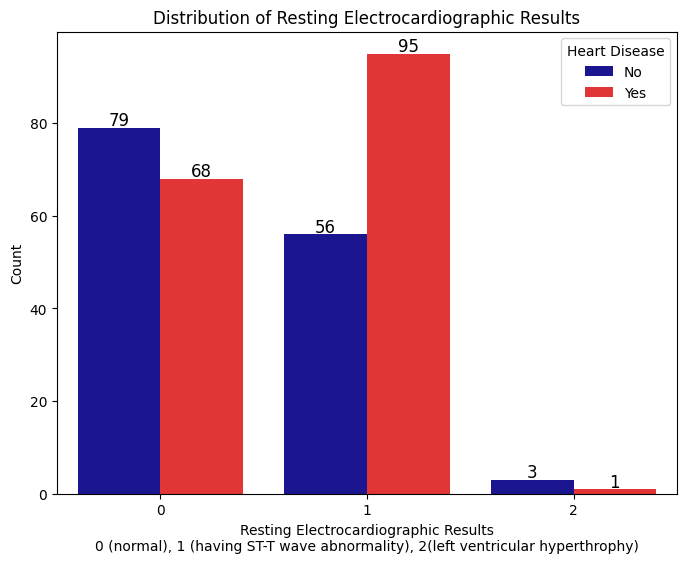

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='restecg', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Resting Electrocardiographic Results\n0 (normal), 1 (having ST-T wave abnormality), 2(left ventricular hyperthrophy)")

plt.ylabel('Count')
plt.title('Distribution of Resting Electrocardiographic Results')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Penderita penyakit jantung mayoritas memiliki  hasil Resting Electrocardiographic  `ST-T wave abnormality`
2. Distribusi pasien pada dataset ini mayoritas memiliki  hasil Resting Electrocardiographic ST-T wave abnormality dan sangat minim pasien yang memiliki hasil Resting Electrocardiographic left ventricular hyperthrophy
3. Jumlah pasien yang terdata adalah 302, dengan 147 pasien memiliki hasil Resting Electrocardiographic normal, 151 pasien memiliki  hasil Resting Electrocardiographic ST-T wave abnormality, dan 4 pasien yang memiliki hasil Resting Electrocardiographic left ventricular hyperthrophy.
* Dari 147 pasien yang memiliki hasil Resting Electrocardiographic normal, terdapat 68 yang terdiagnosa penyakit jantung dan 79 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki hasil Resting Electrocardiographic normal hampir sama
* Dari 151 pasien yang memiliki  hasil Resting Electrocardiographic ST-T wave abnormality, terdapat 95 yang terdiagnosa penyakit jantung dan 56 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki hasil Resting Electrocardiographic ST-T wave abnormality sekitar 2:1
* Dari 4 pasien yang memiliki hasil Resting Electrocardiographic  left ventricular hyperthrophy, terdapat 1 yang terdiagnosa penyakit jantung dan 3 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki  left ventricular hyperthrophy 1 : 3




##### **8. thalach (Max Heart Rate Achieved)**

Text(0.5, 1.0, 'Distribution of Max Heart Rate Achieved')

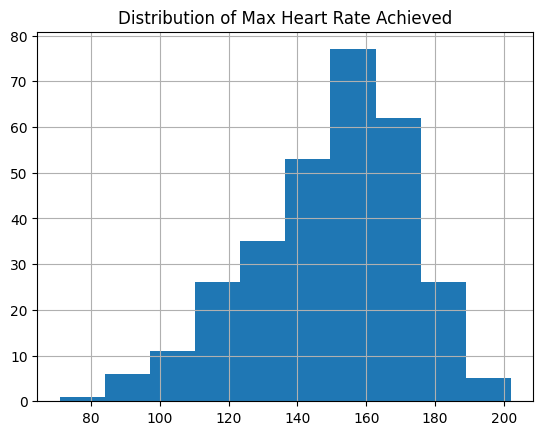

In [ ]:
heart_disease['thalach'].hist().plot(kind='bar')
plt.title('Distribution of Max Heart Rate Achieved')

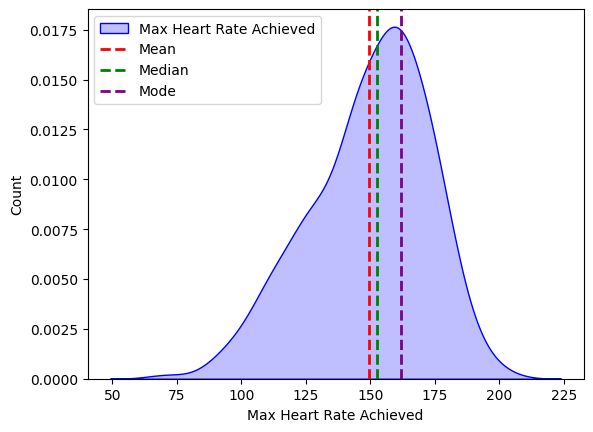

In [ ]:
sns.kdeplot(heart_disease['thalach'], fill=True, color='blue', label='Max Heart Rate Achieved')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_thalach = heart_disease['thalach'].mean()
median_thalach = heart_disease['thalach'].median()
mode_thalach = heart_disease['thalach'].mode()[0]
plt.axvline(mean_thalach, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_thalach, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_thalach, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Menandai label
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

# Mengambil data kolom 'thalach' dari DataFrame heart_disease
thalach_data = heart_disease['thalach']

# Menghitung skewness dari kolom 'thalach'
thalach_skew = skew(thalach_data)

# Menampilkan nilai skewness
print("Skewness dari kolom 'thalach' adalah:", thalach_skew)

Skewness dari kolom 'thalach' adalah: -0.5300218699527917


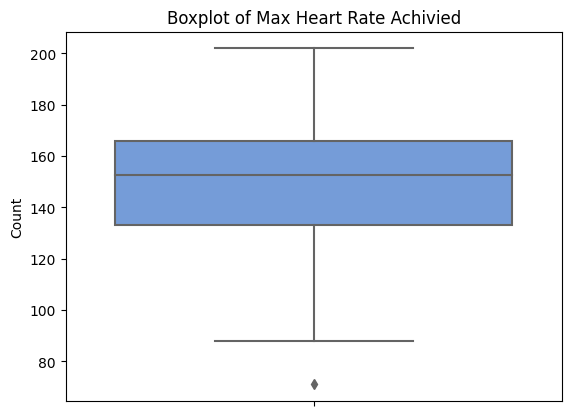

In [ ]:
sns.boxplot(y='thalach', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of Max Heart Rate Achivied')

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['thalach'])
median = np.median(heart_disease['thalach'])
mode = stats.mode(heart_disease['thalach'])

# Membuat data frame
result_heart_disease = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Modus'],
    'Result': [mean, median, mode]
})

# Menampilkan data frame
result_heart_disease

,Statistics,Result
0,Mean,149.569536
1,Median,152.5
2,Modus,"(162, 11)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi pada pasien yang memiliki Max Heart Rate Achieve rentang 150 - 180 bpm.

2. Berdasarkan histogram Distribution of Max Heart Rate Achieve, dapat dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata Max Heart Rate Achieve sebesar 149,6 bpm, mediannya 153 bpm, dan modusnya adalah 162 bpm(dalam hal ini pasien terbanyak memiliki Max Heart Rate Achieve adalah 162 bpm, yaitu berjumlah 11 dari total pasien).

3. Dalam case study ini, mean Max Heart Rate Achieve (149.6 bpm) lebih kecil dari median (153 bom) dan modus (162 bpm) atau secara singkatnya nilai mean < median < modus. Selain itu, adanya nilai  outliers yang kecil pada variabel Max Heart Rate Achieve  dapat memanjangkan ekor distribusi di sisi kiri, yang merupakan salah satu karakteristik distribusi skew negatif. Outliers dengan nilai yang rendah akan "menarik" mean ke arah yang lebih rendah, menyebabkan distribusi miring ke kiri. Sehingga, disimpulkan variabel serum cholestrol ini cenderung berdistribusi skew negatif.

4. ​Dalam hal penanganan missing values, jika data nya cenderung berdistribusi skew, penanganan yang tepat adalah menggantikan missing values dengan nilai median. Hal ini dikarenakan mean akan lebih terpengaruh oleh nilai outlier, sedangkan median tidak terpengaruh oleh nilai outlier. Pada variabel dengan distribusi yang skew, nilai outlier akan cenderung berada di salah satu sisi distribusi. Nilai outlier ini dapat menyebabkan mean menjadi lebih tinggi atau lebih rendah dari nilai median. Jika nilai missing diisi dengan nilai mean, maka nilai rata-rata data dapat menjadi lebih tinggi atau lebih rendah dari nilai sebenarnya. Hal ini dapat menyebabkan hasil analisis data menjadi bias. Sedangkan jika nilai missing diisi dengan nilai median, maka nilai rata-rata data akan cenderung tetap sama dengan nilai sebenarnya. Hal ini dikarenakan median tidak terpengaruh oleh nilai outlier.

##### **9. exang (Angina Included by Exercise)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('exang:N', title='Angina included by exercise (0:no. 1:yes)'),
    y=alt.Y('count(exang):Q', title ='Count of exang'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(exang):Q').properties(height=300, width=400, title = 'Barplot of Angina Included by Exercis')

chart

alt.Chart(...)

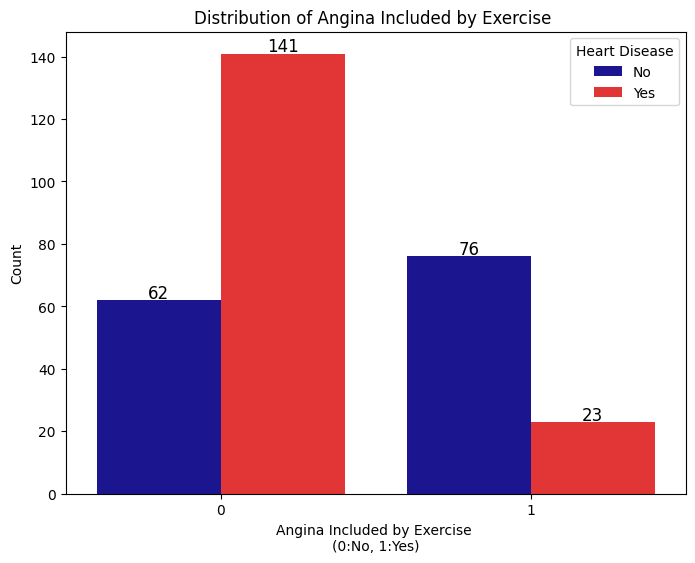

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='exang', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Angina Included by Exercise \n(0:No, 1:Yes)")
plt.ylabel('Count')
plt.title('Distribution of Angina Included by Exercise ')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Penderita penyakit jantung mayoritas tidak memiliki exang (angina included by exercise).
2. Distribusi pasien dalam dataset ini lebih banyak tidak memiliki exang (angina included by exercise) dibandingkan dengan pasien yang memiliki exang (angina included by exercise) dengan rasio 2 : 1
3. Jumlah pasien yang terdata adalah 302, dengan 203 pasien tidak memiliki exang (angina inluded by exercise), dan 99 pasien  memiliki exang (angina inluded by exercise)
  * Dari 203 pasien yang tidak memiliki angina included by exercise, terdapat 141 pasien yang terdiagnosa penyakit jantung dan 62 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang tidak memiliki angina sekitar 2 : 1
  * Dari 99 pasien yang memiliki exang angina included by exercise, terdapat 23 pasien yang terdiagnosa penyakit jantung dan 76 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki angina sekitar 1 : 3

##### **10. oldpeak (ST depression included by exercise relative to rest )**

Text(0.5, 1.0, 'Distribution of ST depression induced by exercise relative to rest')

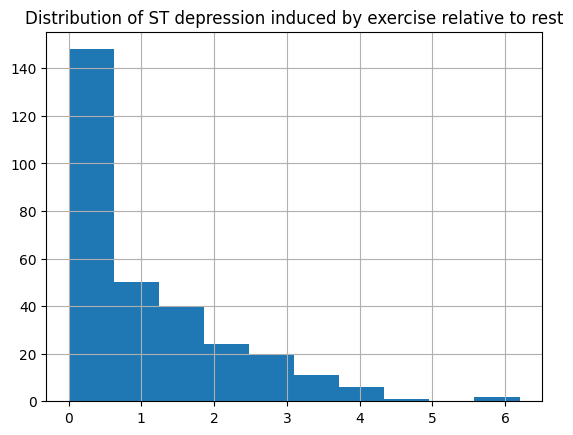

In [ ]:
heart_disease['oldpeak'].hist().plot(kind='bar')
plt.title('Distribution of ST depression induced by exercise relative to rest')

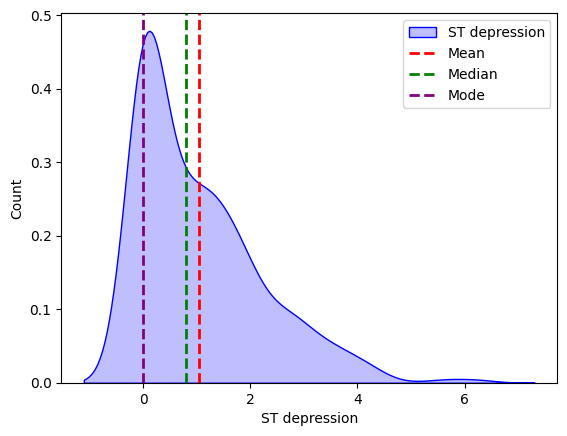

In [ ]:
sns.kdeplot(heart_disease['oldpeak'], fill=True, color='blue', label='ST depression')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_oldpeak = heart_disease['oldpeak'].mean()
median_oldpeak = heart_disease['oldpeak'].median()
mode_oldpeak = heart_disease['oldpeak'].mode()[0]
plt.axvline(mean_oldpeak, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_oldpeak, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_oldpeak, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Menandai label
plt.xlabel('ST depression')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

# Mengambil data kolom 'oldpeak' dari DataFrame heart_disease
oldpeak_data = heart_disease['oldpeak']

# Menghitung skewness dari kolom 'oldpeak'
oldpeak_skew = skew(oldpeak_data)

# Menampilkan nilai skewness
print("Skewness dari kolom 'oldpeak' adalah:", oldpeak_skew)

Skewness dari kolom 'oldpeak' adalah: 1.2598750865993242


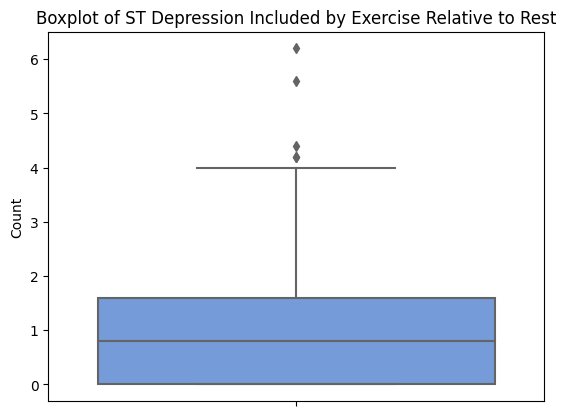

In [ ]:
sns.boxplot(y='oldpeak', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of ST Depression Included by Exercise Relative to Rest')

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['oldpeak'])
median = np.median(heart_disease['oldpeak'])
mode = stats.mode(heart_disease['oldpeak'])

# Membuat data frame
result_heart_disease = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Modus'],
    'Result': [mean, median, mode]
})

# Menampilkan data frame
result_heart_disease

,Statistics,Result
0,Mean,1.043046
1,Median,0.8
2,Modus,"(0.0, 98)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi pada ST depression induced by exercise relative to rest yang rendah

2. Berdasarkan histogram Distribution of ST depression induced by exercise relative to rest, dapat dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata ST depression induced by exercise relative to rest sebesar 1.04, mediannya 0.8, dan modusnya adalah 0(dalam hal ini pasien terbanyak memiliki ST depression induced by exercise relative to rest adalah 0, yaitu berjumlah 98 dari total pasien).

3. Dalam case study ini, mean ST depression induced by exercise relative to rest (1.04) lebih besar dari median (0.8) dan modus (0) atau secara singkatnya nilai mean > median > modus. Selain itu, adanya nilai  outliers yang besar pada variabel ST depression induced by exercise relative to rest dapat memanjangkan ekor distribusi di sisi kanan, yang merupakan salah satu karakteristik distribusi skew positif. Outliers dengan nilai yang tinggi akan "menarik" mean ke arah yang lebih tinggi, menyebabkan distribusi miring ke kanan. Sehingga, disimpulkan variabel ST Depression Included By Exercise Relative to Rest ini cenderung berdistribusi skew positif.

4. Dalam hal penanganan missing values, jika data nya cenderung berdistribusi skew, penanganan yang tepat adalah menggantikan missing values dengan nilai median. Hal ini dikarenakan mean akan lebih terpengaruh oleh nilai outlier, sedangkan median tidak terpengaruh oleh nilai outlier. Pada variabel dengan distribusi yang skew, nilai outlier akan cenderung berada di salah satu sisi distribusi. Nilai outlier ini dapat menyebabkan mean menjadi lebih tinggi atau lebih rendah dari nilai median. Jika nilai missing diisi dengan nilai mean, maka nilai rata-rata data dapat menjadi lebih tinggi atau lebih rendah dari nilai sebenarnya. Hal ini dapat menyebabkan hasil analisis data menjadi bias. Sedangkan jika nilai missing diisi dengan nilai median, maka nilai rata-rata data akan cenderung tetap sama dengan nilai sebenarnya. Hal ini dikarenakan median tidak terpengaruh oleh nilai outlier.

##### **11. slope (Peak Exercise ST segment)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('slope:N', title='Peak exercise ST segment (0:upsloping, 1:flat, 2:downsloping)'),
    y=alt.Y('count(slope):Q', title ='Count of slope'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(slope):Q').properties(height=300, width=400, title = 'Barplot of Peak exercise ST segment')

chart

alt.Chart(...)

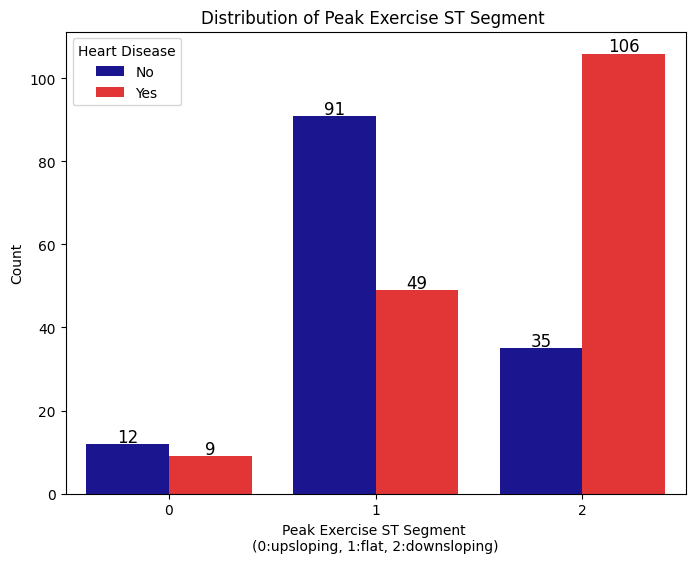

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='slope', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Peak Exercise ST Segment \n(0:upsloping, 1:flat, 2:downsloping)")
plt.ylabel('Count')
plt.title('Distribution of Peak Exercise ST Segment ')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()




**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Pasien dengan Peak Exercise ST Segment downsloping berpotensi terkena penyakit jantung.
2.  Distribusi pasien dalam dataset ini mayoritas memiliki Peak Exercise ST Segment downsloping dan flat serta sangat minim pasien yang memiliki Peak Exercise ST Segment upsloping
3. Jumlah pasien yang terdata adalah 302, dengan 21 pasien memiliki Peak Exercise ST Segment upsloping, 140 pasien memiliki Peak Exercise ST Segment flat, 141 pasien memiliki Peak Exercise ST Segment downsloping.
  * Dari 21 pasien yang memiliki Peak Exercise ST Segment upsloping, terdapat 9 pasien yang terdiagnosa penyakit jantung dan 12 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki Peak Exercise ST Segment upsloping hampir sama
  * Dari 140 pasien yang  memiliki Peak Exercise ST Segment flat, terdapat 49 pasien yang terdiagnosa penyakit jantung dan 91 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki Peak Exercise ST Segment flat sekitar 1:2
  * Dari 21 pasien yang  memiliki Peak Exercise ST Segment downsloping, terdapat 106 pasien yang terdiagnosa penyakit jantung dan 35 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki Peak Exercise ST Segment downsloping sekitar 3:1


##### **12. ca (Number of Major vessels colored by fluoroscopy)**

Number of major vessels colored by fluoroscopy hanya memiliki 4 nilai numerik, yaitu 0-3, dan karena rentang nya kecil, sehingga untuk viualisasinya cukup menggunakan barplot

Text(0.5, 1.0, 'Distribution of Number of Major Vessels Colored by Fluoroscopy')

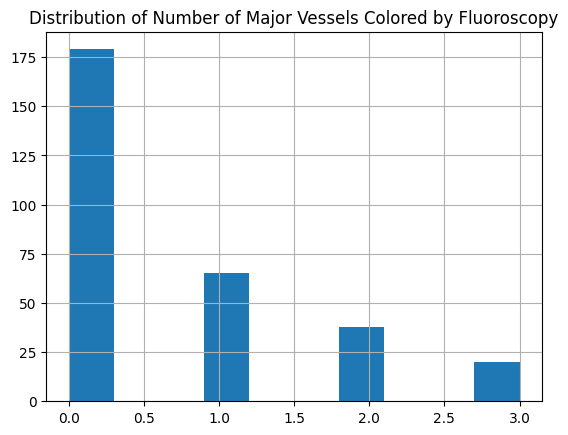

In [ ]:
heart_disease['ca'].hist().plot(kind='bar')
plt.title('Distribution of Number of Major Vessels Colored by Fluoroscopy')

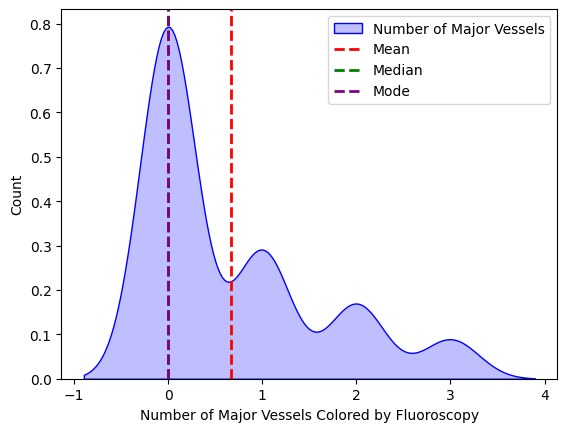

In [ ]:
# Membuat KDE plot
sns.kdeplot(heart_disease['ca'], fill=True, color='blue', label='Number of Major Vessels')

# Menambahkan garis vertikal untuk mean, median, dan modus
mean_ca = heart_disease['ca'].mean()
median_ca = heart_disease['ca'].median()
mode_ca = heart_disease['ca'].mode()[0]
plt.axvline(mean_ca, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_ca, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_ca, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Menandai label
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')
plt.legend()

# Menampilkan grafik
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

# Mengambil data kolom 'ca' dari DataFrame heart_disease
ca_data = heart_disease['ca']

# Menghitung skewness dari kolom 'ca'
ca_skew = skew(ca_data)

# Menampilkan nilai skewness
print("Skewness dari kolom 'ca' adalah:", ca_skew)

Skewness dari kolom 'ca' adalah: 1.197964028313099


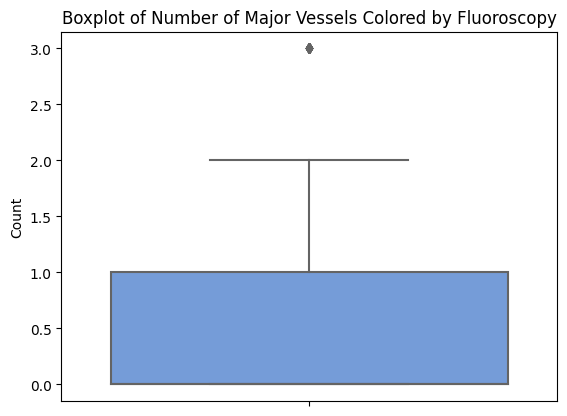

In [ ]:
sns.boxplot(y='ca', data=heart_disease, orient='v', color='#6499E9')

plt.ylabel('Count')
plt.title('Boxplot of Number of Major Vessels Colored by Fluoroscopy')

# Menampilkan plot
plt.show()

In [ ]:
from scipy import stats
# Menghitung mean, median, dan modus
mean = np.mean(heart_disease['ca'])
median = np.median(heart_disease['ca'])
mode = stats.mode(heart_disease['ca'])

# Membuat data frame
result_heart_disease = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Modus'],
    'Result': [mean, median, mode]
})

# Menampilkan data frame
result_heart_disease

,Statistics,Result
0,Mean,0.665563
1,Median,0.0
2,Modus,"(0, 179)"


**Penjelasan:**

1. Kasus penyakit jantung banyak terjadi pada pasien yang Number of Major Vessels Colored by Fluoroscopy nya 0, atau bisa  singkatnya tiak memiliki Major Vessels Colored by Fluoroscopy

2. Berdasarkan histogram Distribution of Number of Major Vessels Colored by Fluoroscopy, dapat dilihat dari keseluruhan hasil statistiknya, pasien memiliki rata-rata Number of Major Vessels Colored by Fluoroscopy sebesar 0,6, mediannya 0, dan modusnya adalah 0(dalam hal ini pasien terbanyak memiliki Number of Major Vessels Colored by Fluoroscopy adalah 0, yaitu berjumlah 179 dari total pasien).
3. Dalam case study ini, mean Number of Major Vessels Colored by Fluoroscopy (0.6) lebih besar dari median (0) atau secara singkatnya nilai mean > median. Selain itu, adanya nilai  outliers yang besar pada variabel number of major vessels colored by fluoroscopy dapat memanjangkan ekor distribusi di sisi kanan, yang merupakan salah satu karakteristik distribusi skew positif. Outliers dengan nilai yang tinggi akan "menarik" mean ke arah yang lebih tinggi, menyebabkan distribusi miring ke kanan. Sehingga, disimpulkan variabel number of major vessels colored by fluoroscopy ini cenderung berdistribusi skew positif.​
4. Dalam hal penanganan missing values, jika data nya cenderung berdistribusi skew, penanganan yang tepat adalah menggantikan missing values dengan nilai median. Hal ini dikarenakan mean akan lebih terpengaruh oleh nilai outlier, sedangkan median tidak terpengaruh oleh nilai outlier. Pada variabel dengan distribusi yang skew, nilai outlier akan cenderung berada di salah satu sisi distribusi. Nilai outlier ini dapat menyebabkan mean menjadi lebih tinggi atau lebih rendah dari nilai median. Jika nilai missing diisi dengan nilai mean, maka nilai rata-rata data dapat menjadi lebih tinggi atau lebih rendah dari nilai sebenarnya. Hal ini dapat menyebabkan hasil analisis data menjadi bias. Sedangkan jika nilai missing diisi dengan nilai median, maka nilai rata-rata data akan cenderung tetap sama dengan nilai sebenarnya. Hal ini dikarenakan median tidak terpengaruh oleh nilai outlier.

​

##### **13. thal (thalassemia)**

In [ ]:
chart = alt.Chart(heart_disease).mark_bar().encode(
    x=alt.X('thal:N', title='Thalassemia'),
    y=alt.Y('count(thal):Q', title ='Count of thal'),
    color=alt.Color('target:N', title='Heart Disease', scale=alt.Scale(range=['#0802A3', '#FF1818'])),
    tooltip='count(thal):Q').properties(height=300, width=400, title = 'Barplot of Thalassemia')

chart

alt.Chart(...)

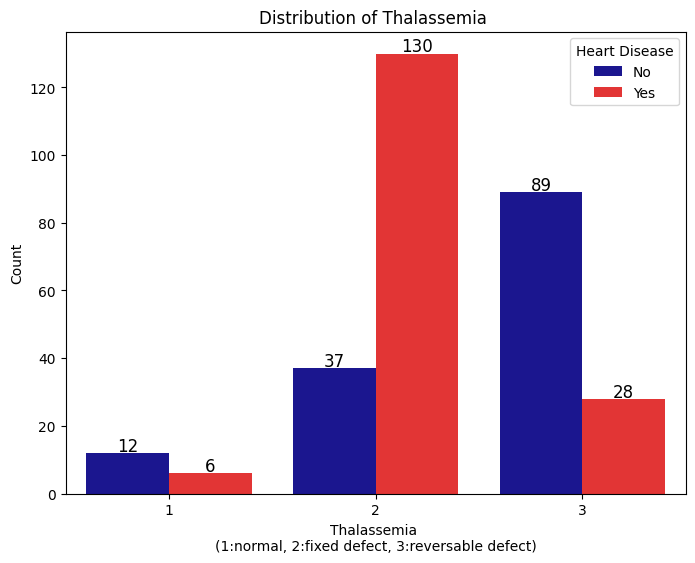

In [ ]:
# Membuat palet warna kustom
custom_palette = {0: '#0802A3', 1: '#FF1818'}

# Membuat barplot dengan palet warna kustom
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='thal', hue='target', palette=custom_palette)

# Menambahkan label jumlah di atas setiap bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Thalassemia \n(1:normal, 2:fixed defect, 3:reversable defect)")
plt.ylabel('Count')
plt.title('Distribution of Thalassemia ')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


**Penjelasan**

Berdasarkan grafik diatas, dapat diambil beberapa insight, diantaranya:
1.  Pasien dengan Hasil tes thalium scan nya adalah fixed defect (Adanya defek tetap pada thalassemia) berpotensi terkena penyakit jantung
2. Jumlah pasien yang terdata adalah 302, dengan 18 pasien memiliki hasil tes thalium scan normal (tidak memiliki penyakit thalassemia), 167 pasien memiliki hasil tes thalium scan fixed defect (Adanya defek tetap pada thalassemia),  dan 117 pasien memiliki hasil thalium scan reversable defect (Adanya defek yang dapat dipulihkan pada thalassemia)
* Dari 18 pasien yang memiliki hasil tes thalium scan normal (tidak memiliki penyakit thalassemia), terdapat 6 pasien yang terdiagnosa penyakit jantung dan 12 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki hasil tes thalium scan normal (tidak memiliki penyakit thalassemia) adalah 1:2
* Dari 167 pasien yang memiliki hasil tes thalium scan fixed defect (Adanya defek tetap pada thalassemia), terdapat 130 pasien yang terdiagnosa penyakit jantung dan 37 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki hasil tes thalium scan fixed defect (Adanya defek tetap pada thalassemia) sekitar 4:1
* Dari 167 pasien yang memiliki hasil thalium scan reversable defect (Adanya defek yang dapat dipulihkan pada thalassemia), terdapat 28 pasien yang terdiagnosa penyakit jantung dan 89 tidak terdiagnosa penyakit jantung. Sehingga, dapat disimpulkan rasio antara pasien terdiagnosa disease dan non disease yang memiliki hasil thalium scan reversable defect (Adanya defek yang dapat dipulihkan pada thalassemia) sekitar 1 : 3


#### **Explain statstical five summaries (describe)** **teks tebal**


In [ ]:
#Descriptive Statistics pada kolom-kolom numerik
numerik = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
heart_disease[numerik].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.665563
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.935142
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,3.000000


**age**

1. Usia minimum pasien 29 tahun dan usia maksimum pasien 77 tahun, sehingga dapat disimpulkan bahwa usia pasien berkisar antara usia 29 tahun hingga 77 tahun
2. Kuartil pertama (Q1) dari usia pasien adalah 48, hal ini berarti 25 % dari 302 pasien berusia kurang dari 48 tahun.
3. Median / Kuartil Kedua (Q2) dari usia pasien adalah 55 tahun, hal ini berarti setengah dari pasien berusia dibawah 55 tahun dan setengahnya lagi usia pasien diatas 55 tahun.
4. Kuartil ketiga (Q3) dari usia pasien adalah 61, hal ini berarti 25% dari 302 pasien berusia lebih dari 61 tahun.


**trestbps**

1. Tekanan darah minimum pasien 99 mmHg dan Tekanan darah maksimum pasien 200 mmHg, sehingga dapat disimpulkan bahwa Tekanan darah pasien berkisar antara 94 mmHg sampai dengan 200 mmHg
2. Kuartil pertama (Q1) dari Tekanan darah pasien adalah 120mmHg, hal ini berarti 25 % dari 302 pasien memiliki Tekanan darah kurang dari 120 mmHg.
3. Median / Kuartil Kedua (Q2) dari Tekanan darah pasien adalah 130 mmHg, hal ini berarti setengah dari pasien memiliki Tekanan darah dibawah 130 mmHg dan setengahnya lagi bertekanan darah  diatas 130 mmHg.
4. Kuartil ketiga (Q3) dari Tekanan darah pasien adalah 140mmHg, hal ini berarti 25% dari 302 pasien memiliki Tekanan darah lebih dari 140mmHg.

**chol**

1. Kadar kolestrol minimum pasien 126 mg/dl dan Kadar kolestrol maksimum pasien 564 mm/dl, sehingga dapat disimpulkan bahwa Kadar kolestrol pasien berkisar antara 126 mg/dl sampai dengan 564 mg/dl
2. Kuartil pertama (Q1) dari Kadar kolestrol pasien adalah 211 mg/dl, hal ini berarti 25% dari 302 pasien memiliki Kadar kolestrol kurang dari 211 mg/dl.
3. Median / Kuartil Kedua (Q2) dari Kadar kolestrol pasien adalah 241 mg/dl, hal ini berarti setengah dari pasien memiliki Kadar kolestrol dibawah 241 mg/dl dan setengahnya lagi berKadar kolestrol  diatas 241 mg/dl.
4. Kuartil ketiga (Q3) dari Kadar kolestrol pasien adalah 275 mg/dl, hal ini berarti 25% dari 302 pasien memiliki Kadar kolestrol lebih dari 275 mg/dl

**thalach**

1. Denyut jantung maximum yang dirasakan pasien berkisar antara 71 sampai dengan 202
2. Kuartil pertama (Q1) dari Denyut jantung maximum yang dirasakan pasien pasien adalah 133, hal ini berarti 25% dari 302 pasien memiliki Denyut jantung maximum  kurang dari 133
3. Median / Kuartil Kedua (Q2) dari Denyut jantung maximum yang dirasakan pasien adalah 153, hal ini berarti setengah dari pasien memiliki Denyut jantung maximum dibawah 153 dan setengahnya lagi memiliki Denyut jantung maximum diatas 153
4. Kuartil ketiga (Q3) dari Denyut jantung maximum yang dirasakan pasien 166, hal ini berarti 25% dari 302 pasien memiliki Denyut jantung maximum diatas 166

**oldpeak**

1. ST depression minimum pasien adalah 0 dan ST depression maksimum pasien adalah 6,2. Dapat disimpulkan terdapat pasien yang tidak memiliki ST depression induced by exercise relative to rest dan ada juga pasien yang memiliki ST depression induced by exercise relative to rest tertinggi, yaitu sebesar 6,2
2. Kuartil pertama (Q1) dari ST depression pasien adalah 0, hal ini berarti 25% dari 302 pasien tidak memiliki ST depression induced by exercise relative to rest
3. Median / Kuartil Kedua (Q2) dari ST depression induced by exercise relative to rest adalah 0,8, hal ini berarti setengah dari pasien memilikiST depression induced by exercise relative to rest dibawah 0,8 dan setengahnya lagi memiliki ST depression induced by exercise relative to rest diatas 0,8
4. Kuartil ketiga (Q3) dari ST depression induced by exercise relative to rest adalah 1,6, hal ini berarti 25% dari 302 pasien memiliki ST depression induced by exercise relative to rest diatas 1,6

**ca**

1. Jumlah dari major vessels colored by fluoroscopy minimum pasien adalah 0 dan Jumlah dari major vessels colored by fluoroscopy  maksimum pasien adalah 3. Dapat disimpulkan terdapat pasien yang tidak memiliki major vessels colored by fluoroscopy  dan ada juga pasien yang memiliki major vessels colored by fluoroscopy sejumlah 3.
2. Kuartil pertama (Q1) dari Jumlah dari major vessels colored by fluoroscopy adalah 0, hal ini berarti 25% dari pasien tidak memiliki major vessels colored by fluoroscopy
3. Median atau kuartil kedua (Q2) dari jumlah dari major vessels colored by fluoroscopy adalah 0. Hal ini berarti terdapat setengah pasien yang tidak memiliki major vessels colored by fluoroscopy  dan setengahnya lagi memiliki major vessels colored by fluoroscopy
4. Kuartil ketiga (Q3) dari Jumlah dari major vessels colored by fluoroscopy adalah 1, hal ini berarti 25% dari pasien memiliki jumlah major vessels colored by fluoroscopy diatas 1



#### **e. Correlation**

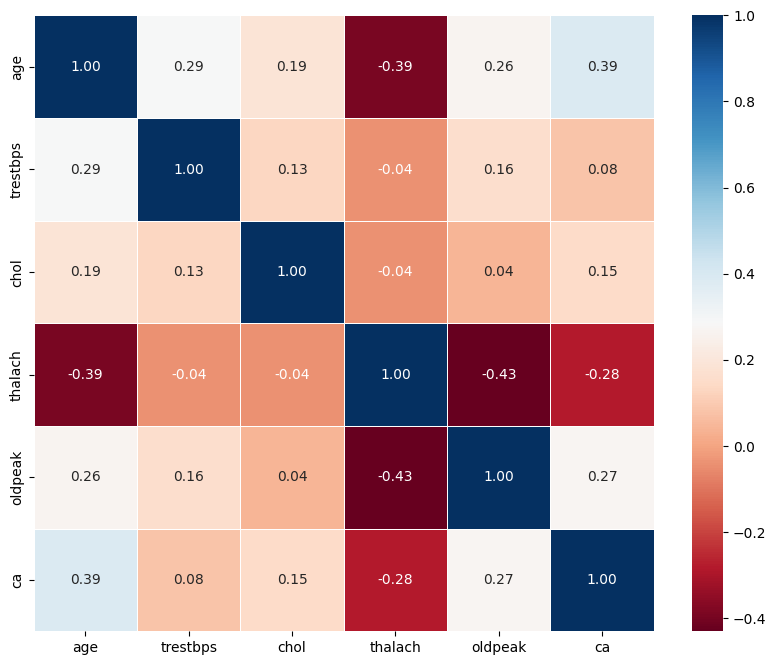

In [ ]:
numerik = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
corr_matrix = heart_disease[numerik].corr(method="spearman")
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,cmap='RdBu',fmt=".2f")

Tidak terdapat multikolinearitas antar variabel numerik.

**Sumber :**

https://ineddeni.wordpress.com/2008/01/26/point-biserial-correlation/

https://datatab.net/tutorial/point-biserial-correlation

**Point-biserial correlation coefficient** adalah metode untuk menganalisis korelasi antara 2 variabel, dimana 1 variabel memiliki data numerikal sedangkan variabel yang satunya lagi adalah data nominal (kategori). Point-biserial correlation coefficient ini digunakan untuk mengukur sejauh mana variabel nominal ini berkorelasi dengan variabel numerik. Dalam case study prediction to heart disease, metode ini digunakan untuk menganalisis korelasi antara variabel numerik, yaitu age, trestbps,chol,thalach, oldpeak, dan ca dengan variabel nominal, yaitu kolom target.

In [ ]:
from scipy.stats import pointbiserialr

num = heart_disease[['age','trestbps','chol','thalach','oldpeak','ca']]
for col in num:
    correlation, p_value = pointbiserialr(heart_disease['target'], num[col])
    print(f"Correlation Coeffecient {col}: {correlation:.3f}")

Correlation Coeffecient age: -0.221
Correlation Coeffecient trestbps: -0.146
Correlation Coeffecient chol: -0.081
Correlation Coeffecient thalach: 0.420
Correlation Coeffecient oldpeak: -0.429
Correlation Coeffecient ca: -0.464


**Penjelasan :**

Berdasarkan hasil keofien korelasi diatas, dapat diambil kesimpulan:
* Feature chol, trestbps, dan age memiliki korelasi negatif yang sangat rendah dan  rendah terhadap variabel target, yaitu dengan koefisien korelasi sebesar -0.081, -0.146, -0.221.
* Faeture thalach berkorelasi positif  cukup kuat terhadap variabel target, yaitu dengan koefisien korelasi sebesar 0.420. Feature oldpeak & ca berkorelasi negatif  cukup kuat terhadap variabel target, yaitu koefisien korelasi sebesar -0.429, dan -0.464

Korelasi positif dan negatif menggambarkan arah hubungan antara variabel-variabel tersebut dan variabel target (diagnosa penyakit jantung). Ketika korelasi dua variabel negatif, maka koefisien satu variabel cenderung meningkat, sementara nilai variabel lainnya cenderung menurun. Sebaliknya, ketika korelasi dua variabel positif, maka ketika koefisien satu variabel meningkat, nilai variabel lainnya juga cenderung meningkat.


Dalam case study ini,  variabel "oldpeak" dan "ca" berkorelasi negatif dengan variabel target. Ini berarti bahwa ketika nilai-nilai variabel-variabel ini meningkat, kemungkinan besar pasien tidak terdiagnosa dengan penyakit jantung (variabel target=0) cenderung meningkat. Dengan kata lain, nilai-nilai ini berkorelasi dengan kecenderungan bahwa semakin tinggi ST depression pasien dan semakin banyak jumlah dari major vessels colored by fluoroscopy pada pasien, maka semakin rendah kemungkinan pasien terdiagnosa penyakit jantung.

Sebaliknya, variabel "thalach" berkorelasi positif dengan variabel target. Ini berarti bahwa ketika nilai-nilai variabel ini meningkat, kemungkinan besar pasien terdiagnosa dengan penyakit jantung (variabel target=1) cenderung meningkat. Dengan kata lain, nilai-nilai ini berkorelasi dengan kecenderungan bahwa semakin tinggi denyut jantung maksimum pasien, semakin tinggi juga kemungkinan pasien terdiagnosa  penyakit jantung.


### **Feature Engineering**

#### **a. Feature Selection**

Feature selection merupakan proses pemilihan feature-feature proses yang paling relevan dan informatif dari dataset yang ada. Tujuannya adalah untuk meningkatkan kualitas model dan mengurangi kompleksitas, memori, dan waktu komputasi yang diperlukan dalam analisis data. Dalam hal ini, variabel-variabel numerik yang memiliki korelasi rendah terhadap variabel target tidak digunakan untuk proses selanjutnya, sehingga kolom ini dihapus.

In [ ]:
heart_disease = heart_disease.drop(['chol','trestbps'], axis = 1) #1

**Note**: Untuk saat ini, kolom age tidak dihapus karena akan digunakan dalam feature extraction. Untuk assigment berikutnya dalam pemodelan machine learning, feature ini akan dihapus pada tahap data prepocessing

#### **b. Feature Extraction**

Feature extraction merupakan proses mengubah atau menghasilkan fitur-fitur baru dari data asli atau fitur-fitur yang sudah ada. Tujuan dari feature extraction adalah untuk menghasilkan informasi yang lebih relevan atau representatif dari data yang dapat digunakan dalam pemodelan machine learning.

In [ ]:
# Membuat kategori baru pada usia
# Sumber klasifikasi usia : https://www.neliti.com/publications/249455/klasifikasi-kelompok-umur-manusia-berdasarkan-analisis-dimensifraktal-box-counti
def Age(age):
    if 26 <= age <= 45:
        return 'Adult'
    elif 46 <= age <= 65:
        return 'Elderly'
    else:
        return 'Senior'

heart_disease.loc[:, 'age_category'] = heart_disease['age'].apply(Age) #2
heart_disease.head(5)

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly


In [ ]:
# Membuat status max heart rate berdasarkan kategori usia
# sumber : https://www.halodoc.com/artikel/ketahui-detak-jantung-yang-ideal-saat-berolahraga
def determine_thalach_status(age, thalach):
    age = int(age)  # Ubah usia menjadi integer
    if 20 <= age < 30 and 100 <= thalach <= 200:
        return "Normal"
    if 30 <= age < 35 and 95 <= thalach <= 190:
        return "Normal"
    if 35 <= age < 40 and 93 <= thalach <= 185:
        return "Normal"
    if 40 <= age < 45 and 90 <= thalach <= 180:
        return "Normal"
    if 45 <= age < 50 and 88 <= thalach <= 175:
        return "Normal"
    if 50 <= age < 55 and 85 <= thalach <= 170:
        return "Normal"
    if 55 <= age < 60 and 83 <= thalach <= 165:
        return "Normal"
    if 60 <= age < 65 and 80 <= thalach <= 160:
        return "Normal"
    if 65 <= age < 70 and 78 <= thalach <= 155:
        return "Normal"
    if 70 <= age < 80 and 75 <= thalach <= 150:
        return "Normal"
    else:
        return "Abnormal"

# Menambahkan kolom 'thalach_category' ke dalam dataframe 'heart_disease'
heart_disease['thalach_category'] = heart_disease.apply(lambda row: determine_thalach_status(row['age'], row['thalach']), axis=1)


heart_disease.head(5) #4


,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal


In [ ]:
# Mengonversi kolom 'ca' menjadi variabel biner (1 jika ada pembuluh darah utama, 0 jika tidak)
heart_disease['ca_category'] = heart_disease['ca'].apply(lambda x: 1 if x > 0 else 0)

# Menampilkan dataframe hasil
heart_disease.head(5)  #5



,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal,1
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal,0
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal,1


In [ ]:
# Membuat kategori baru pada ST Depression included by exercise to rest
def oldpeak(ST_depression):
    if 0.0 <= ST_depression<= 0.4:
        return 'No ST depression'
    elif 0.5 <= ST_depression <= 1.4:
        return 'Mild ST depression'
    elif 1.5 <= ST_depression <= 2.9:
        return 'Moderate ST depression'
    else:
        return 'Severe ST depression'

heart_disease.loc[:, 'ST_depression'] = heart_disease['oldpeak'].apply(oldpeak)

heart_disease.head(5) #3

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category,ST_depression
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal,1,Mild ST depression
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0,Severe ST depression
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal,0,Moderate ST depression
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1,No ST depression
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal,1,Moderate ST depression


#### **b.Feature Transformation**

Label Encoding


In [ ]:
# Label encoding dengan library label encode --> otomatis
from sklearn.preprocessing import LabelEncoder
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()
# Mengkodekan kategori
heart_disease['ST_depression_code'] = label_encoder.fit_transform(heart_disease['ST_depression'])

# Mencetak DataFrame hasil
heart_disease.head(5)

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category,ST_depression,ST_depression_code
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal,1,Mild ST depression,0
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0,Severe ST depression,3
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal,0,Moderate ST depression,1
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1,No ST depression,2
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal,1,Moderate ST depression,1


In [ ]:
# Label encoding manual menggunakan function map
from sklearn.preprocessing import LabelEncoder

# Membuat dictionary
label_encoder = {'No ST depression': 0,'Mild ST depression': 1,'Moderate ST depression':2,'Severe ST depression':3}
heart_disease["ST_depression_code"] = heart_disease["ST_depression"].map(label_encoder)

# Mencetak DataFrame hasil
heart_disease.head(5)

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category,ST_depression,ST_depression_code
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal,1,Mild ST depression,1
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0,Severe ST depression,3
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal,0,Moderate ST depression,2
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1,No ST depression,0
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal,1,Moderate ST depression,2


In [ ]:
# Menghapus kolom ST_depression karena sudah di label encoding
del heart_disease['ST_depression']


In [ ]:
heart_disease

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category,ST_depression_code
0,52,1,0,0,1,168,0,1.0,2,2,3,0,Elderly,Normal,1,1
1,53,1,0,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0,3
2,70,1,0,0,1,125,1,2.6,0,0,3,0,Senior,Normal,0,2
3,61,1,0,0,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1,0
4,62,0,0,1,1,106,0,1.9,1,3,2,0,Elderly,Normal,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,0,0,115,0,1.5,1,0,2,1,Senior,Normal,0,2
733,44,0,2,0,1,175,0,0.6,1,0,2,1,Adult,Normal,0,1
739,52,1,0,0,1,161,1,0.0,2,1,3,0,Elderly,Normal,1,0
843,59,1,3,0,0,125,0,0.0,2,0,2,0,Elderly,Normal,0,0


**One Hot Encoding**

In [ ]:
OHP = ['fbs', 'cp']
heart_disease = pd.get_dummies(heart_disease, columns = OHP)
heart_disease.head()

,age,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,thalach_category,ca_category,ST_depression_code,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3
0,52,1,1,168,0,1.0,2,2,3,0,Elderly,Normal,1,1,1,0,1,0,0,0
1,53,1,0,155,1,3.1,0,0,3,0,Elderly,Normal,0,3,0,1,1,0,0,0
2,70,1,1,125,1,2.6,0,0,3,0,Senior,Normal,0,2,1,0,1,0,0,0
3,61,1,1,161,0,0.0,2,1,3,0,Elderly,Abnormal,1,0,1,0,1,0,0,0
4,62,0,1,106,0,1.9,1,3,2,0,Elderly,Normal,1,2,0,1,1,0,0,0


**Scaling**

Teknik scaling dalam feature transformation adalah proses mengubah skala atau rentang nilai dari fitur (features) dalam dataset. Tujuan utama dari scaling adalah untuk memastikan bahwa setiap fitur memiliki kontribusi yang setara terhadap model machine learning, terlepas dari besarnya nilai dalam skala aslinya. Scaling juga dapat membantu algoritma machine learning yang sensitif terhadap skala (seperti algoritma berbasis jarak) untuk berfungsi lebih baik.

Salah satu teknik scaling yang umum digunakan adalah Min-Max Scaling atau juga dikenal sebagai Normalization. Teknik ini memiliki tujuan untuk mengubah nilai-nilai fitur ke dalam rentang tertentu, biasanya antara 0 dan 1.

In [ ]:
# Membuat Function

def min_max_scaling(df, col):
  result = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  return result

<Axes: >

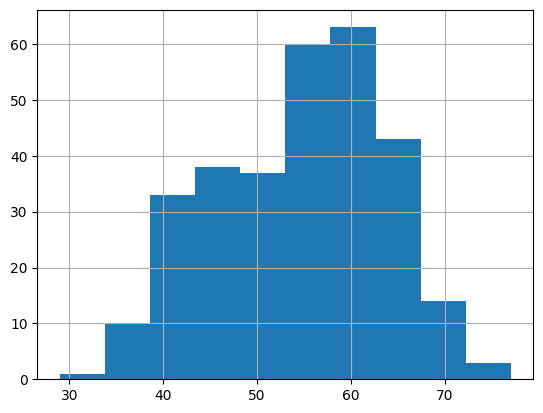

In [ ]:
# Kolom Age sebelum di scaling
heart_disease["age"].hist()

<Axes: >

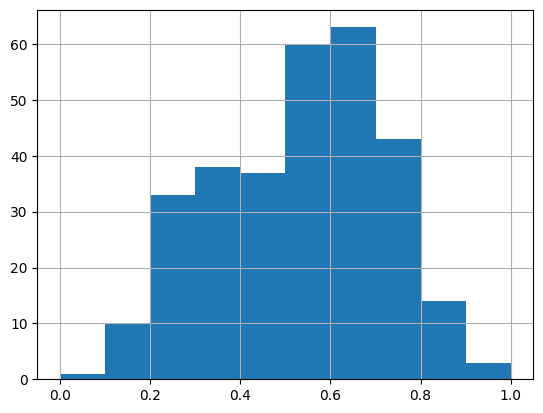

In [ ]:
# Kolom Age sesudah di scaling
min_max_scaling(heart_disease, col = "age").hist()

In [ ]:
# Menambahkan hasil scaling ke dalam dataframe Heart Disease
scaled_age = min_max_scaling(heart_disease, col = "age")
heart_disease["scaled_age"] = scaled_age
heart_disease.head(5) #8

,age,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,target,...,thalach_category,ca_category,ST_depression_code,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3,scaled_age
0,52,1,1,168,0,1.0,2,2,3,0,...,Normal,1,1,1,0,1,0,0,0,0.479167
1,53,1,0,155,1,3.1,0,0,3,0,...,Normal,0,3,0,1,1,0,0,0,0.500000
2,70,1,1,125,1,2.6,0,0,3,0,...,Normal,0,2,1,0,1,0,0,0,0.854167
3,61,1,1,161,0,0.0,2,1,3,0,...,Abnormal,1,0,1,0,1,0,0,0,0.666667
4,62,0,1,106,0,1.9,1,3,2,0,...,Normal,1,2,0,1,1,0,0,0,0.687500


<Axes: >

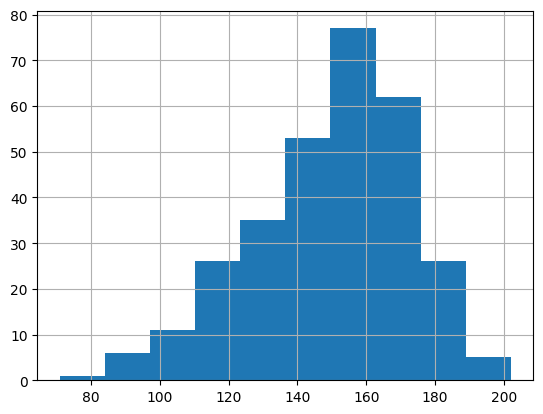

In [ ]:
# Kolom Thalach sebelum di scaling
heart_disease["thalach"].hist()

<Axes: >

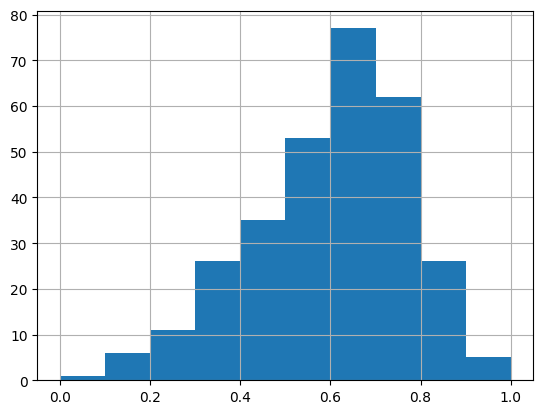

In [ ]:
# Kolom thalach sesudah di scaling
min_max_scaling(heart_disease, col = "thalach").hist()

In [ ]:
# Menambahkan hasil scaling ke dalam dataframe Heart Disease
scaled_thalach = min_max_scaling(heart_disease, col = "thalach")
heart_disease["scaled_thalach"] = scaled_thalach
heart_disease.head(5) #9


,age,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,target,...,ca_category,ST_depression_code,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3,scaled_age,scaled_thalach
0,52,1,1,168,0,1.0,2,2,3,0,...,1,1,1,0,1,0,0,0,0.479167,0.740458
1,53,1,0,155,1,3.1,0,0,3,0,...,0,3,0,1,1,0,0,0,0.500000,0.641221
2,70,1,1,125,1,2.6,0,0,3,0,...,0,2,1,0,1,0,0,0,0.854167,0.412214
3,61,1,1,161,0,0.0,2,1,3,0,...,1,0,1,0,1,0,0,0,0.666667,0.687023
4,62,0,1,106,0,1.9,1,3,2,0,...,1,2,0,1,1,0,0,0,0.687500,0.267176


<Axes: >

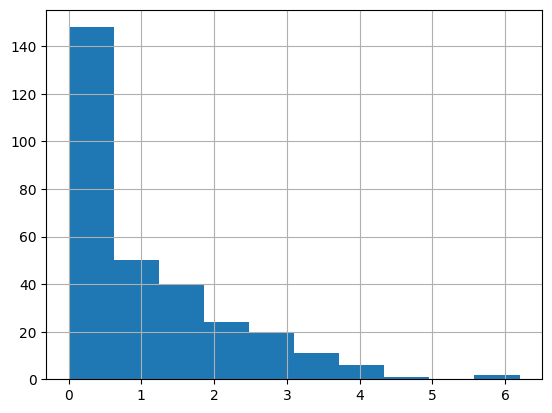

In [ ]:
# Kolom oldpeak sebelum di scaling
heart_disease["oldpeak"].hist()

<Axes: >

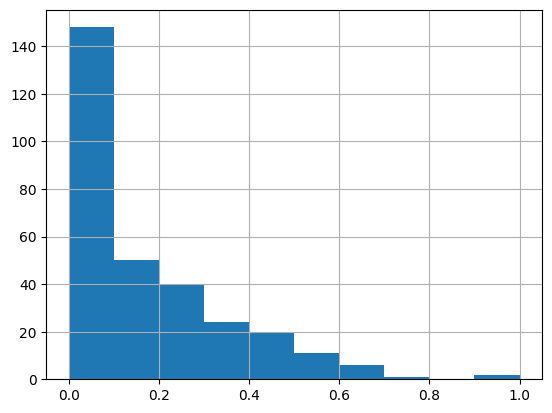

In [ ]:
# Kolom oldpeak sesudah di scaling
min_max_scaling(heart_disease, col = "oldpeak").hist()

In [ ]:

# Menambahkan hasil scaling ke dalam dataframe Heart Disease
scaled_oldpeak = min_max_scaling(heart_disease, col = "oldpeak")
heart_disease["scaled_oldpeak"] = scaled_oldpeak

heart_disease.head(5) #10

,age,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,target,...,ST_depression_code,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3,scaled_age,scaled_thalach,scaled_oldpeak
0,52,1,1,168,0,1.0,2,2,3,0,...,1,1,0,1,0,0,0,0.479167,0.740458,0.161290
1,53,1,0,155,1,3.1,0,0,3,0,...,3,0,1,1,0,0,0,0.500000,0.641221,0.500000
2,70,1,1,125,1,2.6,0,0,3,0,...,2,1,0,1,0,0,0,0.854167,0.412214,0.419355
3,61,1,1,161,0,0.0,2,1,3,0,...,0,1,0,1,0,0,0,0.666667,0.687023,0.000000
4,62,0,1,106,0,1.9,1,3,2,0,...,2,0,1,1,0,0,0,0.687500,0.267176,0.306452


<Axes: >

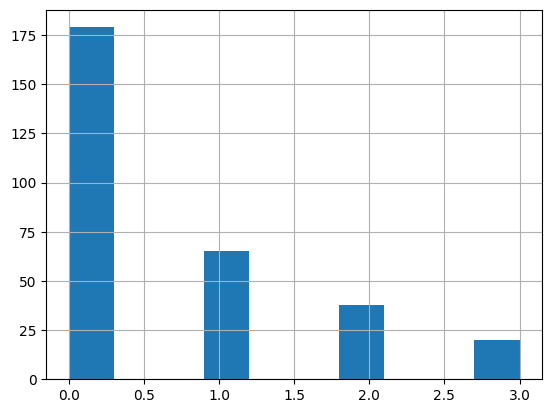

In [ ]:
# Kolom ca sebelum di scaling
heart_disease["ca"].hist()

<Axes: >

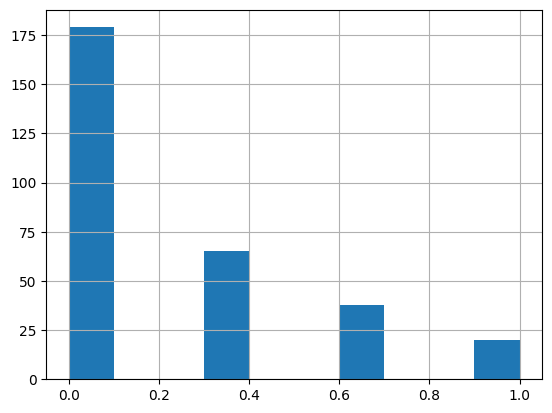

In [ ]:
# Kolom ca sesudah di scaling
min_max_scaling(heart_disease, col = "ca").hist()

In [ ]:
# Menambahkan hasil scaling ke dalam dataframe Heart Disease
scaled_ca = min_max_scaling(heart_disease, col = "ca")
heart_disease["scaled_ca"] = scaled_ca

heart_disease.head(5) #11

,age,sex,restecg,thalach,exang,oldpeak,slope,ca,thal,target,...,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3,scaled_age,scaled_thalach,scaled_oldpeak,scaled_ca
0,52,1,1,168,0,1.0,2,2,3,0,...,1,0,1,0,0,0,0.479167,0.740458,0.161290,0.666667
1,53,1,0,155,1,3.1,0,0,3,0,...,0,1,1,0,0,0,0.500000,0.641221,0.500000,0.000000
2,70,1,1,125,1,2.6,0,0,3,0,...,1,0,1,0,0,0,0.854167,0.412214,0.419355,0.000000
3,61,1,1,161,0,0.0,2,1,3,0,...,1,0,1,0,0,0,0.666667,0.687023,0.000000,0.333333
4,62,0,1,106,0,1.9,1,3,2,0,...,0,1,1,0,0,0,0.687500,0.267176,0.306452,1.000000
